<a href="https://colab.research.google.com/github/AshaMariam/AshaMariam_Internship_Complete/blob/main/AshaMariam_Internship_Week_04_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Internship on Data Science and Analytics

### Project 2

## **Customer Segmentation for Marketing Strategy**

Data Collection

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Loading Data
train_data = pd.read_csv('/content/Train.csv')
test_data = pd.read_csv('/content/Test.csv')

Data Exploration

In [ ]:
train_data.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


In [ ]:
train_data.tail()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
31642,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,265.0,3,other,0
31643,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,NaN,0,unknown,0
31644,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,NaN,0,unknown,0
31645,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,NaN,0,unknown,0
31646,id_1723,38.0,technician,single,tertiary,no,1045.0,no,no,cellular,18,aug,183.0,10.0,NaN,0,unknown,0


In [ ]:
train_data.shape

(31647, 18)

In [ ]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [ ]:
train_data.columns

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome',
       'term_deposit_subscribed'],
      dtype='object')

In [ ]:
# Check unique values for each column in test_data
for column in train_data.columns:
    unique_values = train_data[column].unique()
    print(f"Unique values for column '{column}': {unique_values}")

Unique values for column 'id': ['id_43823' 'id_32289' 'id_10523' ... 'id_44679' 'id_4841' 'id_1723']
Unique values for column 'customer_age': [28. 34. 46. 41. 65. 57. 37. 29. 50. 52. 35. 18. 55. 42. 53. 58. 70. 31.
 38. 45. 33. 25. 61. 20. 54. 36. 64. 30. 32. 48. 49. 40. 27. 47. 39. 51.
 26. 56. 44. nan 60. 24. 62. 43. 21. 59. 23. 78. 71. 76. 22. 72. 73. 63.
 69. 88. 67. 81. 79. 77. 75. 74. 86. 68. 19. 66. 95. 80. 82. 83. 84. 97.
 87. 91. 85. 89. 93. 92.]
Unique values for column 'job_type': ['management' 'blue-collar' 'technician' 'services' 'retired'
 'entrepreneur' 'admin.' 'student' 'housemaid' 'self-employed' 'unknown'
 'unemployed']
Unique values for column 'marital': ['single' 'married' 'divorced' nan]
Unique values for column 'education': ['tertiary' 'secondary' 'primary' 'unknown']
Unique values for column 'default': ['no' 'yes']
Unique values for column 'balance': [ 285.  934.  656. ... 1764. 7032. -511.]
Unique values for column 'housing_loan': ['yes' 'no']
Unique values for

In [ ]:
train_data.describe().style.background_gradient(cmap='Oranges')

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed
count,31028.000000,31248.000000,31647.000000,31336.000000,31535.000000,5816.000000,31647.000000,31647.000000
mean,40.439216,1368.112615,15.818561,256.184038,2.776629,224.995186,0.591620,0.107246
std,10.751392,3085.342417,8.322970,256.181479,3.153293,114.991828,2.499675,0.309430
min,18.000000,-8020.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32.000000,72.000000,8.000000,103.000000,1.000000,133.000000,0.000000,0.000000
50%,39.000000,449.000000,16.000000,179.000000,2.000000,195.000000,0.000000,0.000000
75%,48.000000,1413.000000,21.000000,315.250000,3.000000,329.000000,0.000000,0.000000
max,97.000000,102128.000000,31.000000,4900.000000,63.000000,871.000000,275.000000,1.000000


In [ ]:
test_data.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,NaN,0,unknown
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success


In [ ]:
test_data.shape

(13564, 17)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                13564 non-null  object 
 1   customer_age                      13294 non-null  float64
 2   job_type                          13564 non-null  object 
 3   marital                           13483 non-null  object 
 4   education                         13564 non-null  object 
 5   default                           13564 non-null  object 
 6   balance                           13383 non-null  float64
 7   housing_loan                      13564 non-null  object 
 8   personal_loan                     13490 non-null  object 
 9   communication_type                13564 non-null  object 
 10  day_of_month                      13564 non-null  int64  
 11  month                             13564 non-null  object 
 12  last

In [ ]:
test_data.columns

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome'],
      dtype='object')

In [ ]:
test_data.describe().style.background_gradient(cmap='Oranges')

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign
count,13294.000000,13383.000000,13564.000000,13442.000000,13519.000000,2441.000000,13564.000000
mean,40.450429,1341.405514,15.778089,261.171031,2.730971,223.582958,0.553966
std,10.747881,2839.670990,8.321562,261.195560,2.941338,116.196526,1.762402
min,18.000000,-6849.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,32.000000,70.500000,8.000000,102.000000,1.000000,131.000000,0.000000
50%,39.000000,447.000000,16.000000,182.000000,2.000000,194.000000,0.000000
75%,48.000000,1466.000000,21.000000,325.000000,3.000000,323.000000,0.000000
max,94.000000,71187.000000,31.000000,3863.000000,50.000000,842.000000,38.000000


In [ ]:
# Check unique values for each column in test_data
for column in test_data.columns:
    unique_values = test_data[column].unique()
    print(f"Unique values for column '{column}': {unique_values}")

Unique values for column 'id': ['id_17231' 'id_34508' 'id_44504' ... 'id_43066' 'id_18375' 'id_12898']
Unique values for column 'customer_age': [55. 24. 46. 56. 62. 35. 27. 29. 50. 37. 52. 51. 30. 32. 54. 39. 33. 38.
 71. 36. 79. 31. nan 53. 22. 66. 49. 34. 57. 58. 41. 43. 40. 28. 44. 73.
 48. 42. 59. 47. 26. 74. 23. 45. 18. 25. 64. 61. 78. 81. 60. 63. 68. 21.
 80. 65. 20. 72. 69. 67. 19. 70. 75. 85. 77. 82. 76. 84. 83. 94. 87. 91.
 90. 86.]
Unique values for column 'job_type': ['retired' 'blue-collar' 'technician' 'housemaid' 'self-employed'
 'management' 'admin.' 'unemployed' 'entrepreneur' 'services' 'student'
 'unknown']
Unique values for column 'marital': ['married' 'single' 'divorced' nan]
Unique values for column 'education': ['tertiary' 'secondary' 'unknown' 'primary']
Unique values for column 'default': ['no' 'yes']
Unique values for column 'balance': [7136.  179.  143. ... 7101. 3322. 6943.]
Unique values for column 'housing_loan': ['no' 'yes']
Unique values for column 'perso


We have similar features in the test dataset as the training dataset except for the '**term_deposit_subscribed**'. We will predict the term_deposit_subscribed using the model built using the train data. Given below is the description for each variable.



1. 'id': A unique identifier for each customer.

2. 'customer_age': Age of the customer.

3. 'job_type': The type of job the customer is engaged in.

4. 'marital': Marital status of the customer.

5. 'education': Education level of the customer.

6. 'default': Indicates whether the customer has credit in default.

7. 'balance': Balance in the customer's account.

8. 'housing_loan': Indicates whether the customer has a housing loan.

9. 'personal_loan': Indicates whether the customer has a personal loan.

10. 'communication_type': The type of communication used.

11. 'day_of_month': Day of the month when the customer was contacted.

12. 'month': Month when the customer was contacted.

13. 'last_contact_duration': Duration of the last contact in seconds.

14. 'num_contacts_in_campaign': Number of contacts made during this campaign for this customer.

15. 'days_since_prev_campaign_contact': Number of days since the previous campaign contact.

16. 'num_contacts_prev_campaign': Number of contacts performed before this campaign for this customer.

17. 'prev_campaign_outcome': Outcome of the previous marketing campaign.

18. 'term_deposit_subscribed': Indicates whether the customer subscribed to the term deposit.



Handling Missing Values

In [ ]:
train_data.isnull().sum()


id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

In [ ]:

# Numerical features: mean imputation
numerical_features = ['customer_age', 'balance', 'last_contact_duration',
                      'num_contacts_in_campaign', 'days_since_prev_campaign_contact']
for feature in numerical_features:
    train_data[feature].fillna(train_data[feature].mean(), inplace=True)

# Categorical features: mode imputation
categorical_features = ['marital', 'personal_loan']
for feature in categorical_features:
    train_data[feature].fillna(train_data[feature].mode()[0], inplace=True)


In [ ]:
train_data.isnull().sum()

id                                  0
customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
term_deposit_subscribed             0
dtype: int64

In [ ]:
test_data.isnull().sum()

id                                      0
customer_age                          270
job_type                                0
marital                                81
education                               0
default                                 0
balance                               181
housing_loan                            0
personal_loan                          74
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 122
num_contacts_in_campaign               45
days_since_prev_campaign_contact    11123
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
dtype: int64

In [ ]:
# Numerical features: mean imputation
numerical_features = ['customer_age', 'balance', 'last_contact_duration',
                      'num_contacts_in_campaign', 'days_since_prev_campaign_contact']
for feature in numerical_features:
    test_data[feature].fillna(test_data[feature].mean(), inplace=True)

# Categorical features: mode imputation
categorical_features = ['marital', 'personal_loan']
for feature in categorical_features:
    test_data[feature].fillna(test_data[feature].mode()[0], inplace=True)

In [ ]:
test_data.isnull().sum()

id                                  0
customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
dtype: int64

Outlier Detection and Treatment

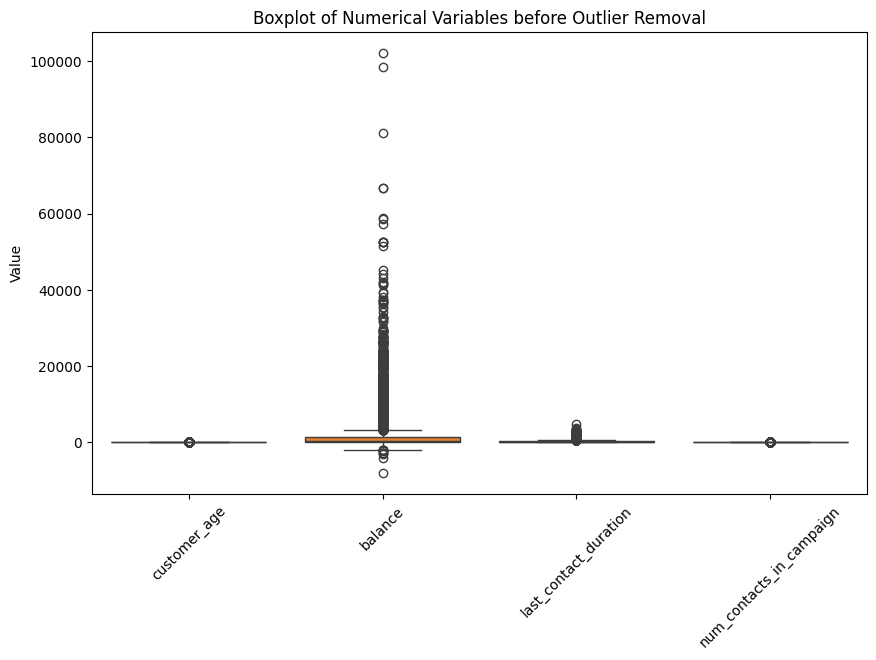

In [ ]:
#train_data
# Boxplot for numerical variables before outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data[['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign']], orient='v')
plt.title('Boxplot of Numerical Variables before Outlier Removal')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#train_data
# Outlier Detection and Treatment
# Example: Removing outliers using z-score method
from scipy import stats
train_data = train_data[(np.abs(stats.zscore(train_data.select_dtypes(include='number'))) < 3).all(axis=1)]



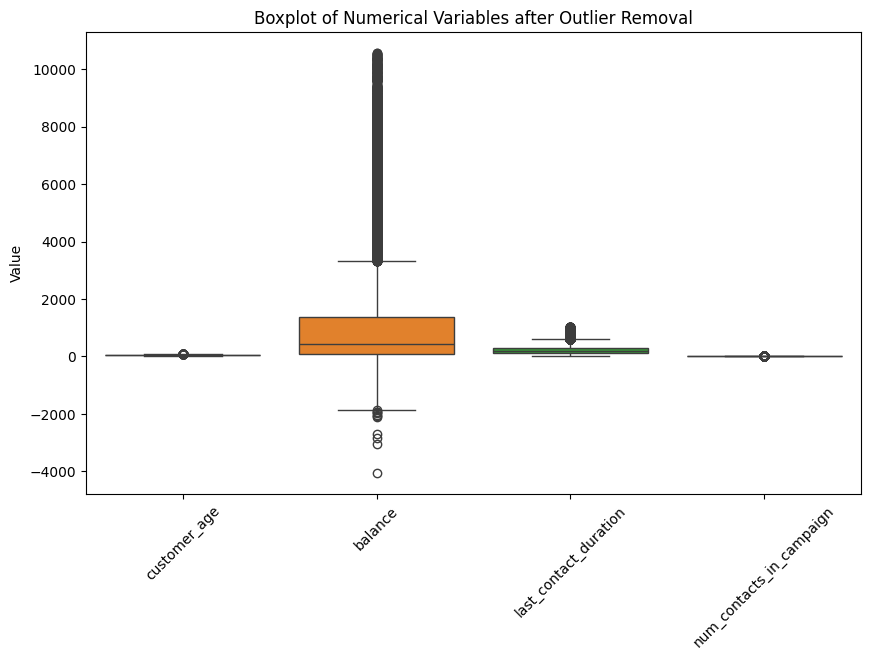

In [ ]:
# Boxplot for numerical variables after outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data[['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign']], orient='v')
plt.title('Boxplot of Numerical Variables after Outlier Removal')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

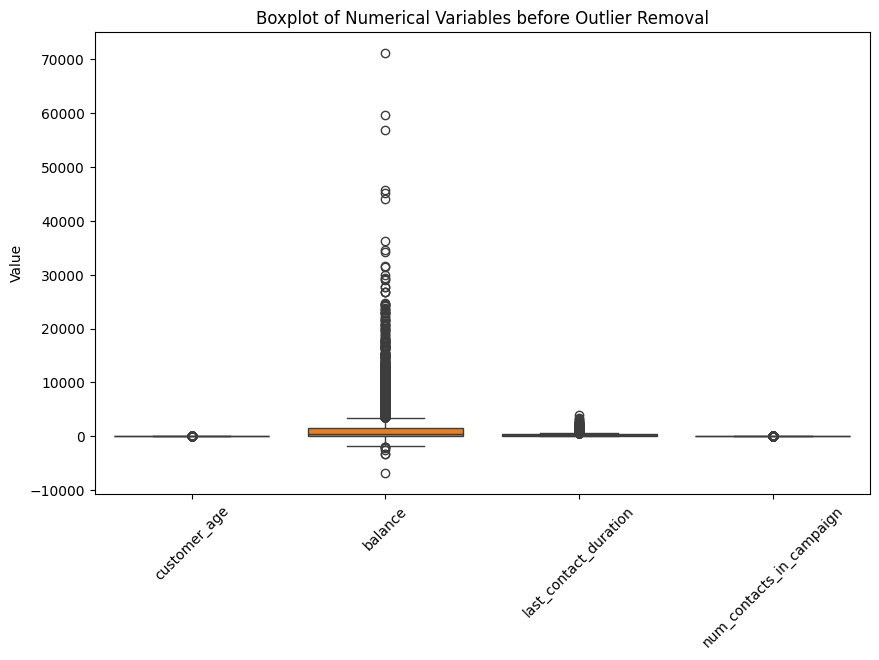

In [ ]:
#test_data
# Boxplot for numerical variables before outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(data=test_data[['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign']], orient='v')
plt.title('Boxplot of Numerical Variables before Outlier Removal')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#test_data
# Outlier Detection and Treatment
# Example: Removing outliers using z-score method
from scipy import stats
test_data = test_data[(np.abs(stats.zscore(test_data.select_dtypes(include='number'))) < 3).all(axis=1)]



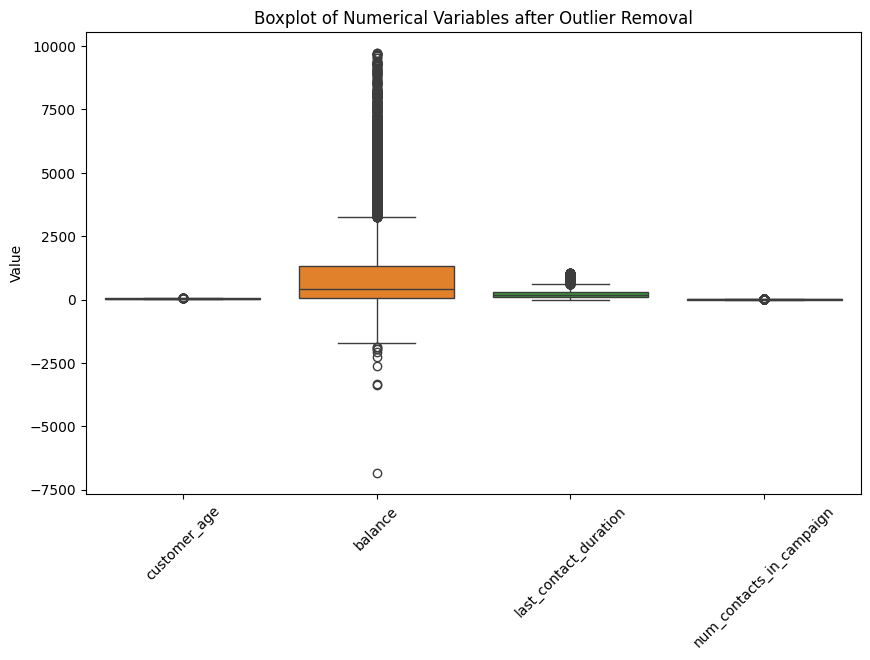

In [ ]:
# Boxplot for numerical variables after outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(data=test_data[['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign']], orient='v')
plt.title('Boxplot of Numerical Variables after Outlier Removal')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

Data Visualization

In [ ]:
train_data["term_deposit_subscribed"].value_counts()

term_deposit_subscribed
0    26306
1     2576
Name: count, dtype: int64

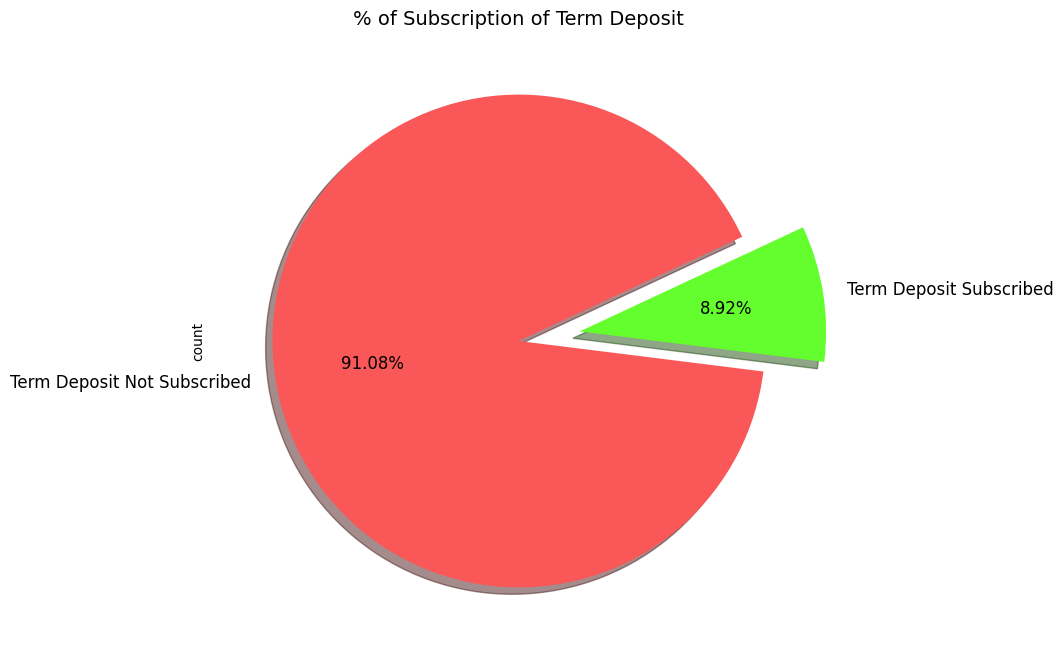

In [ ]:
#train_data
fig, ax = plt.subplots(figsize=(8,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Term Deposit Not Subscribed", "Term Deposit Subscribed"

train_data["term_deposit_subscribed"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax, shadow=True, colors=colors,
                                             labels=labels, fontsize=12, startangle=25)

plt.title('% of Subscription of Term Deposit', fontsize=14)
plt.show()

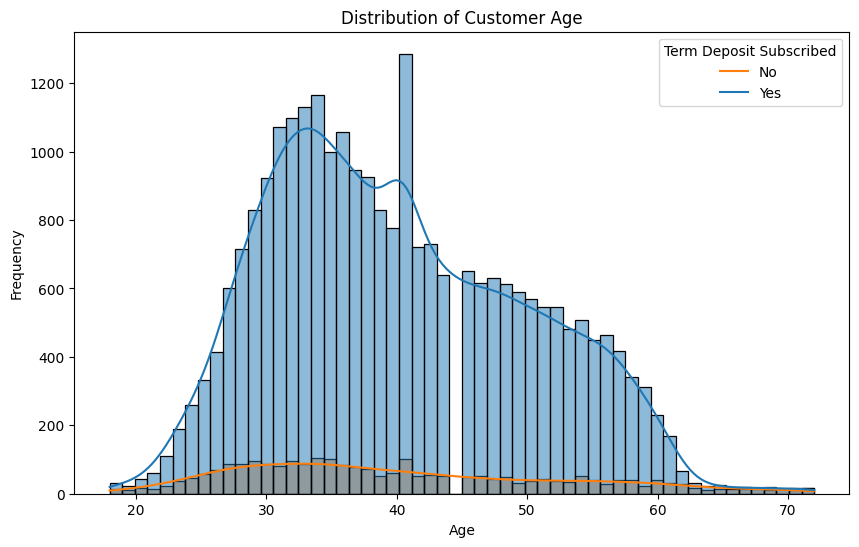

In [ ]:
#train_data
# Histogram of Customer Age vs Term deposit subscribed
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='customer_age', hue='term_deposit_subscribed', kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Term Deposit Subscribed', labels=['No', 'Yes'])
plt.show()

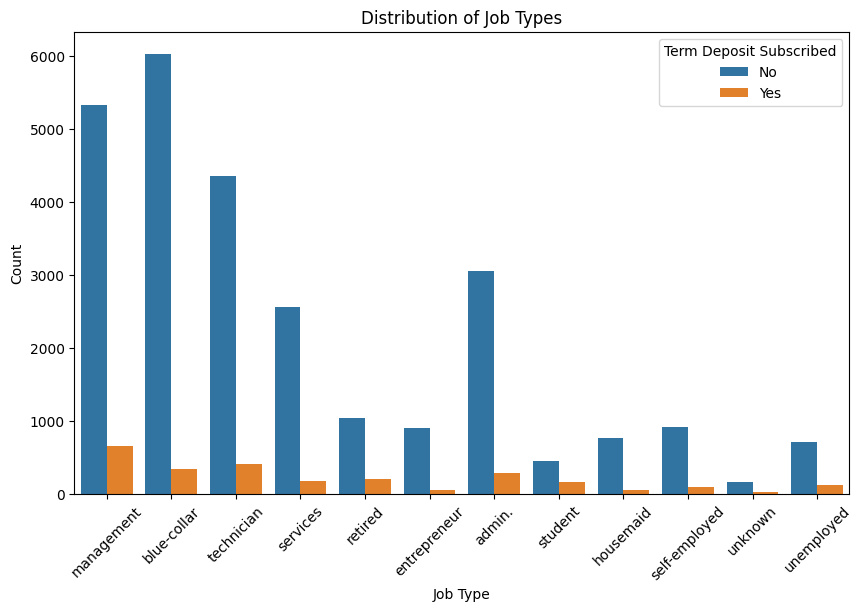

In [ ]:
# Bar Plot of Job Types
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='job_type', hue='term_deposit_subscribed')
plt.title('Distribution of Job Types')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Term Deposit Subscribed', labels=['No', 'Yes'])
plt.show()

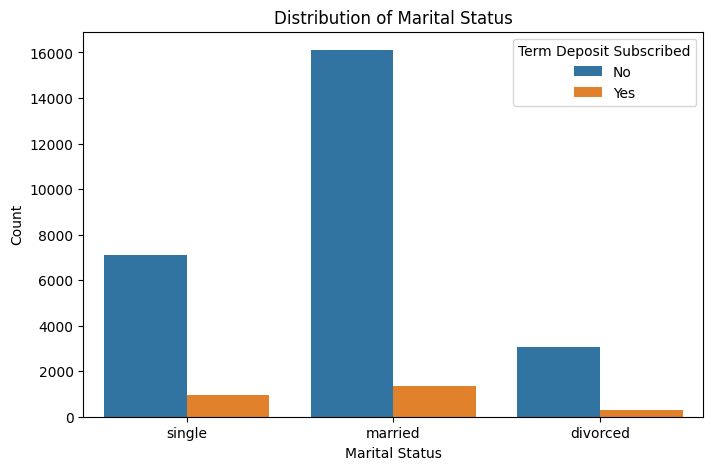

In [ ]:
# Bar Plot of Marital Status
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='marital', hue='term_deposit_subscribed')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Term Deposit Subscribed', labels=['No', 'Yes'])
plt.show()

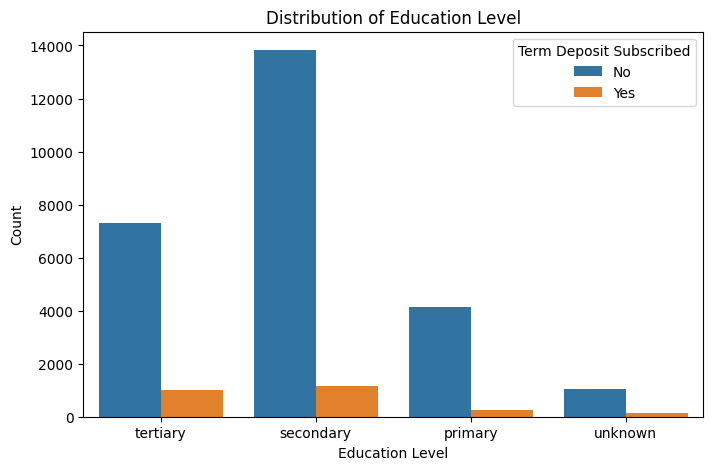

In [ ]:
# Bar Plot of Education Level
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='education', hue='term_deposit_subscribed')
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Term Deposit Subscribed', labels=['No', 'Yes'])
plt.show()

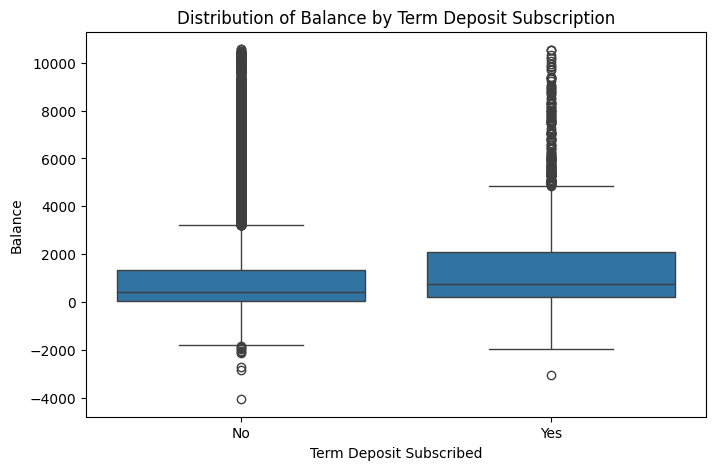

In [ ]:
# Box Plot of Balance
plt.figure(figsize=(8, 5))
sns.boxplot(data=train_data, x='term_deposit_subscribed', y='balance')
plt.title('Distribution of Balance by Term Deposit Subscription')
plt.xlabel('Term Deposit Subscribed')
plt.ylabel('Balance')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

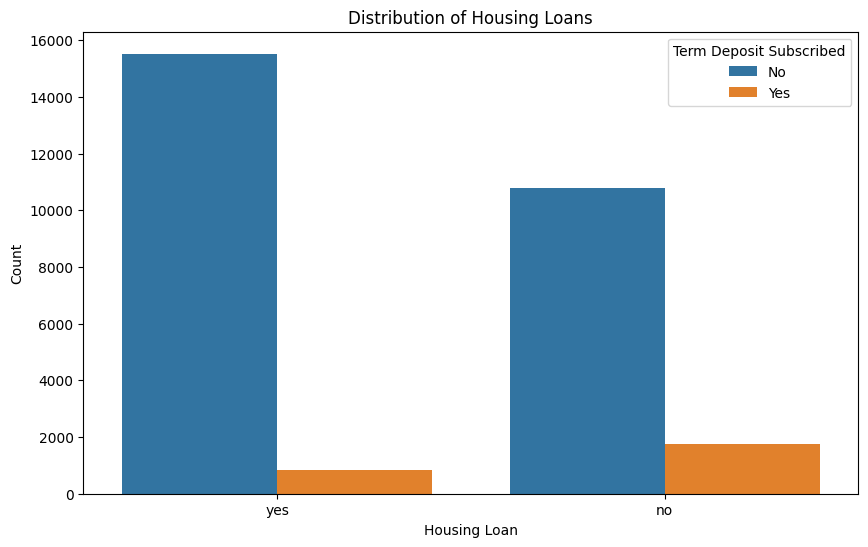

In [ ]:
# Bar Plot of Housing Loans and Personal Loans
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='housing_loan', hue='term_deposit_subscribed')
plt.title('Distribution of Housing Loans')
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.legend(title='Term Deposit Subscribed', labels=['No', 'Yes'])
plt.show()

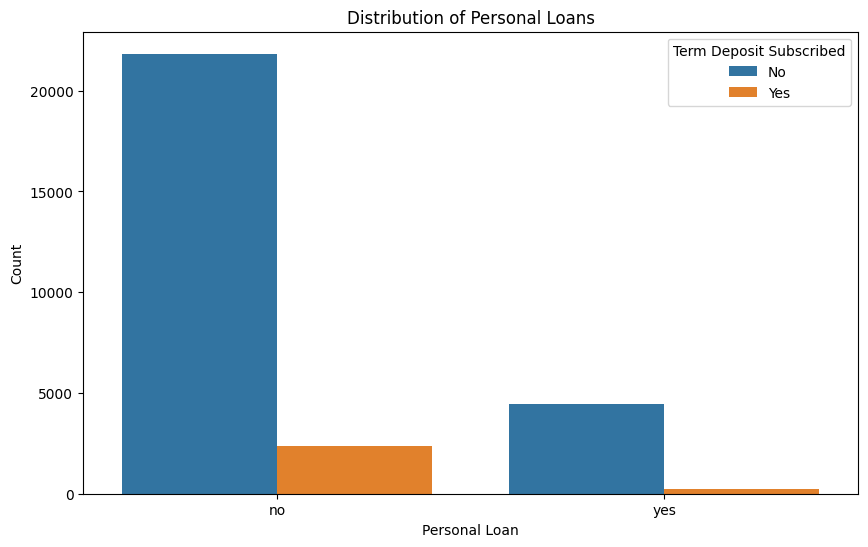

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='personal_loan', hue='term_deposit_subscribed')
plt.title('Distribution of Personal Loans')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.legend(title='Term Deposit Subscribed', labels=['No', 'Yes'])
plt.show()

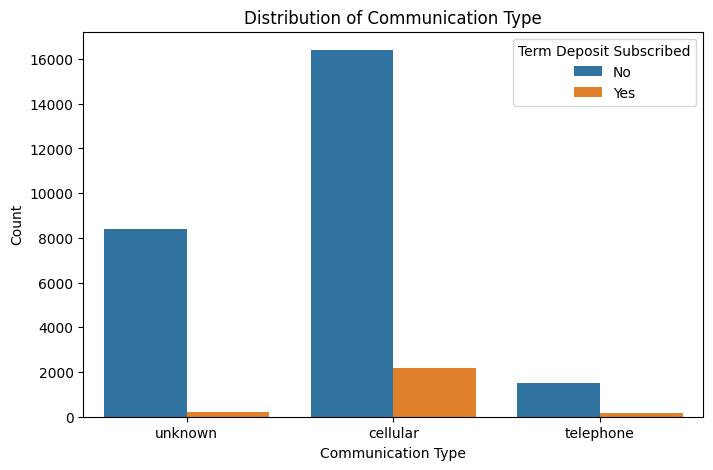

In [ ]:
# Bar Plot of Communication Type
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='communication_type', hue='term_deposit_subscribed')
plt.title('Distribution of Communication Type')
plt.xlabel('Communication Type')
plt.ylabel('Count')
plt.legend(title='Term Deposit Subscribed', labels=['No', 'Yes'])
plt.show()

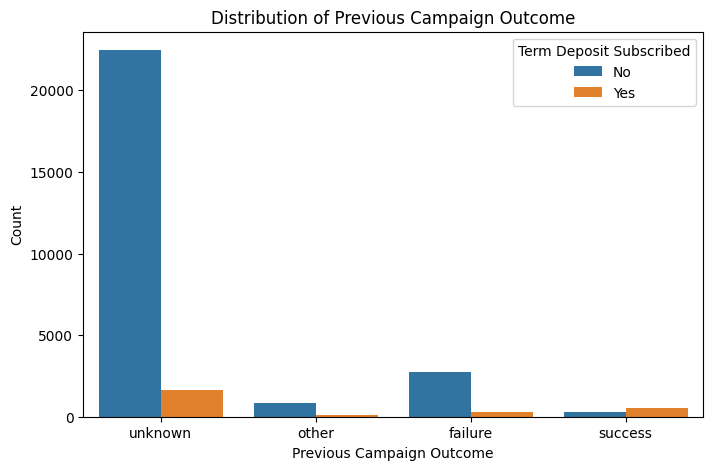

In [ ]:
# Bar Plot of Previous Campaign Outcome
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='prev_campaign_outcome', hue='term_deposit_subscribed')
plt.title('Distribution of Previous Campaign Outcome')
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Count')
plt.legend(title='Term Deposit Subscribed', labels=['No', 'Yes'])
plt.show()

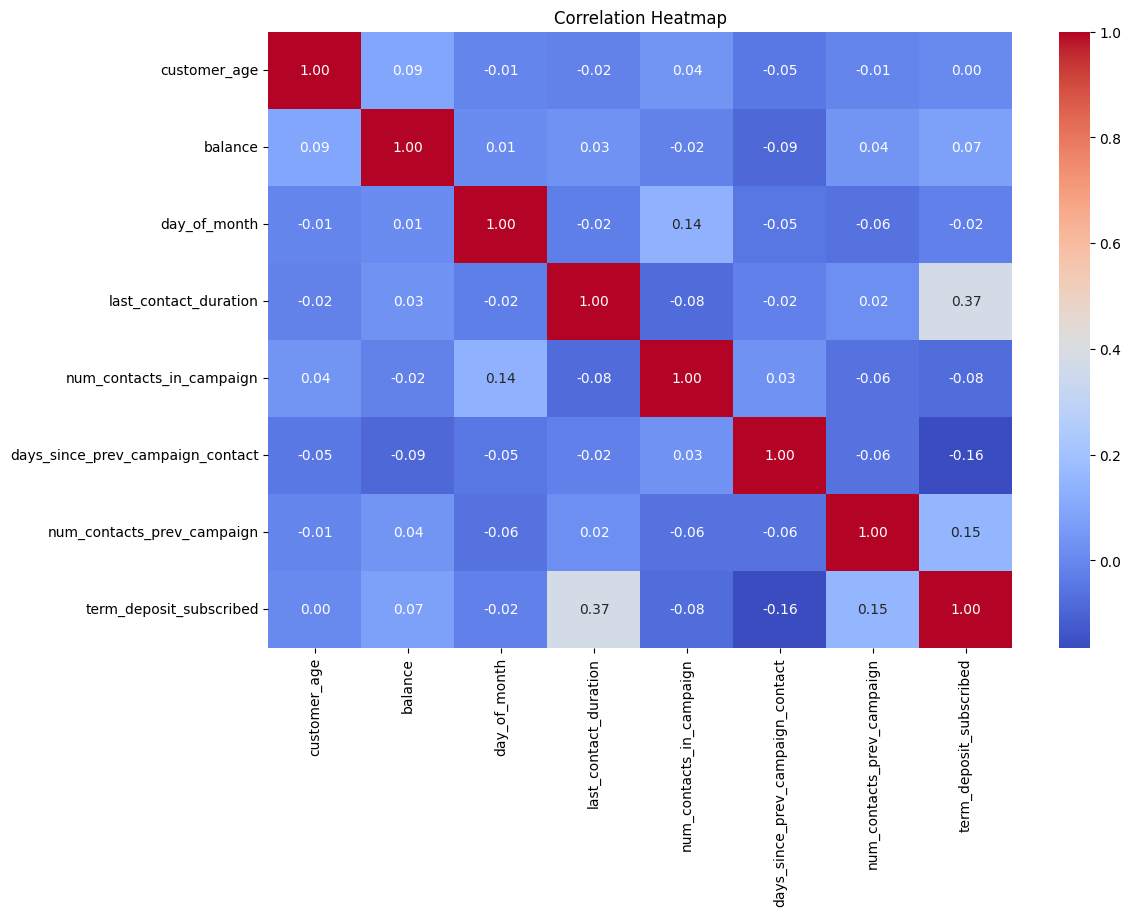

In [ ]:
# Correlation Heatmap
numeric_data = train_data.select_dtypes(include='number')
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


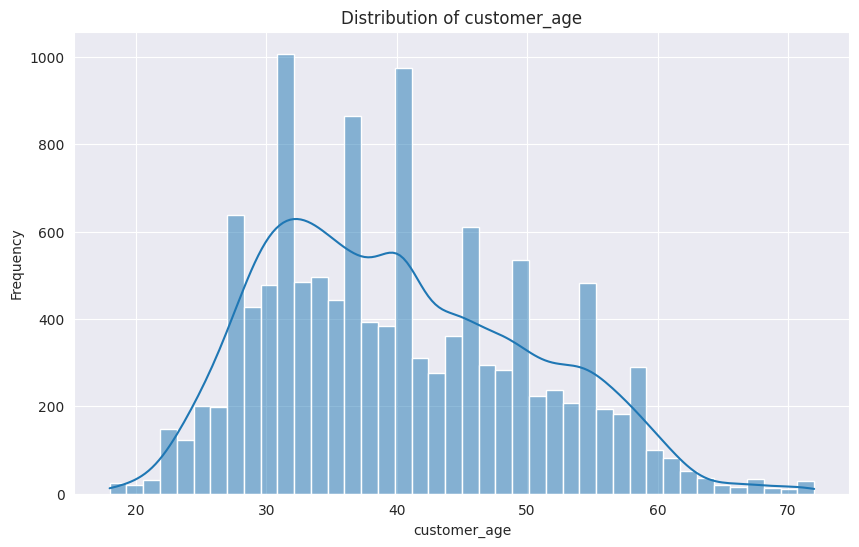

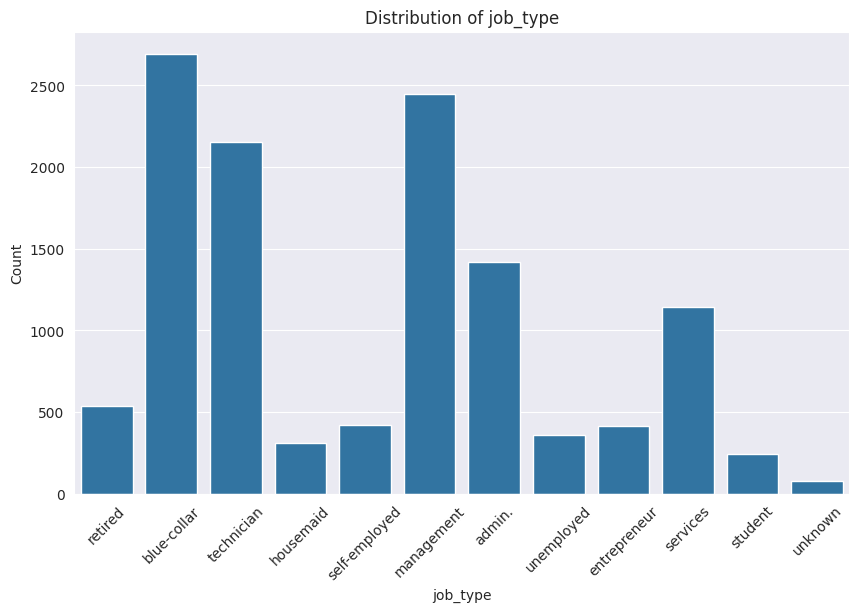

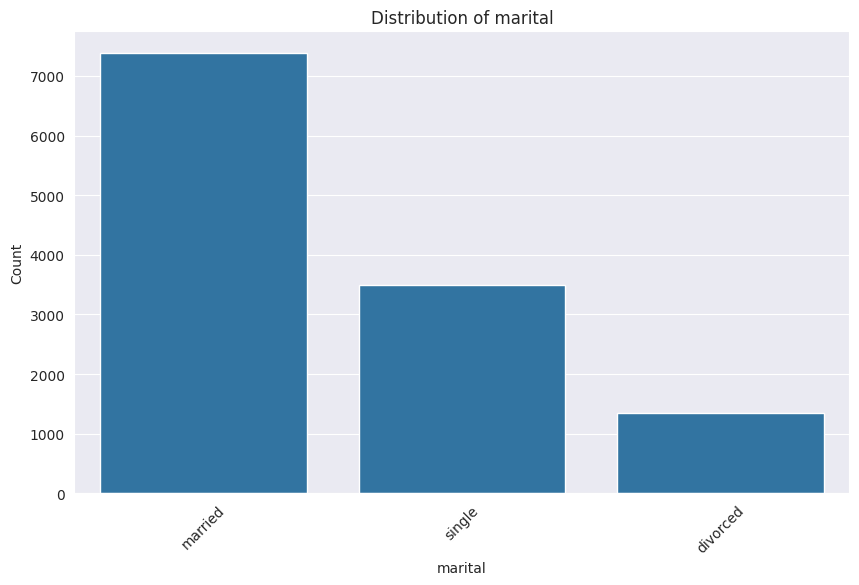

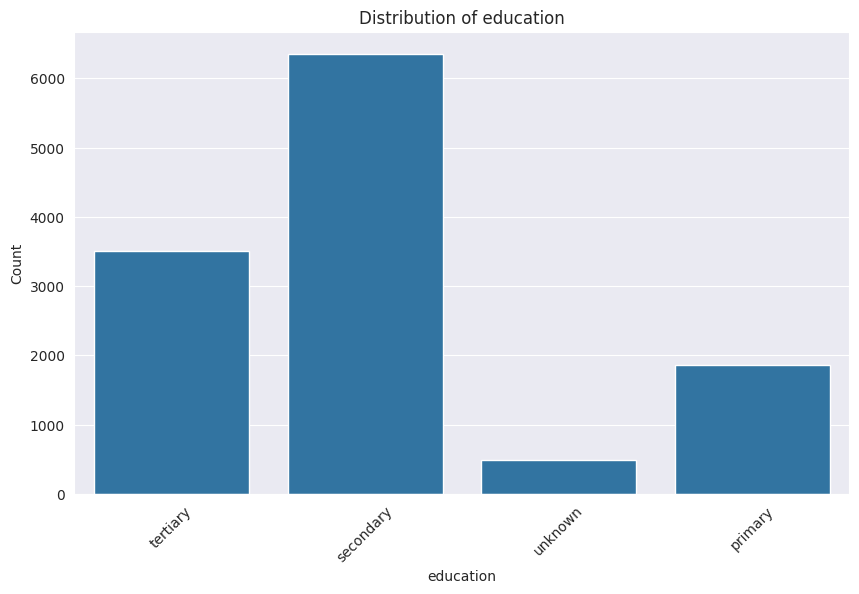

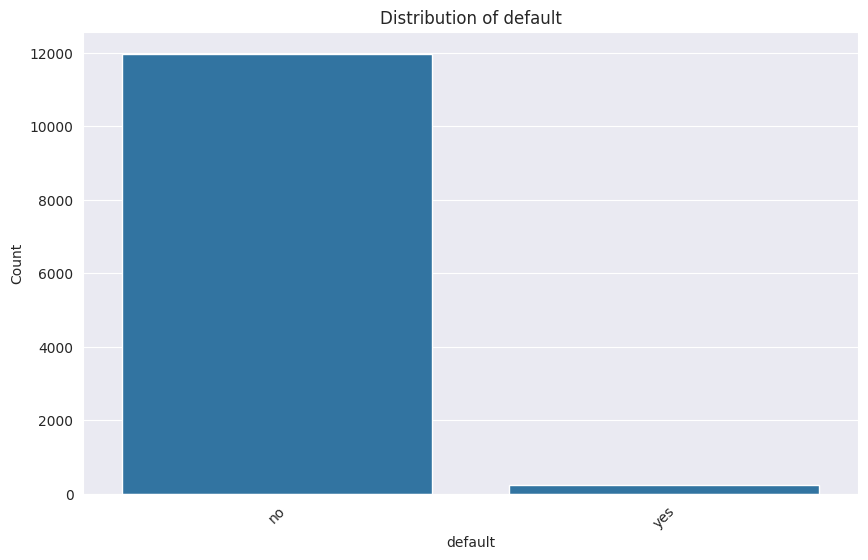

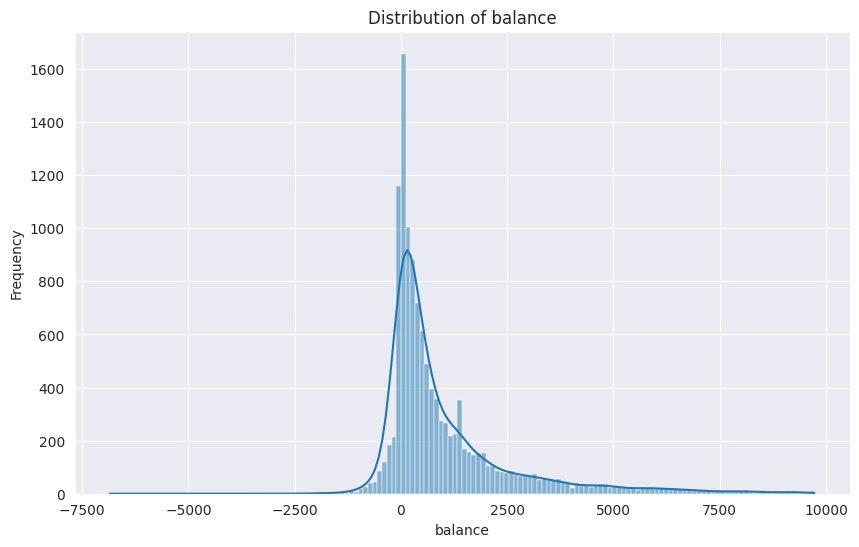

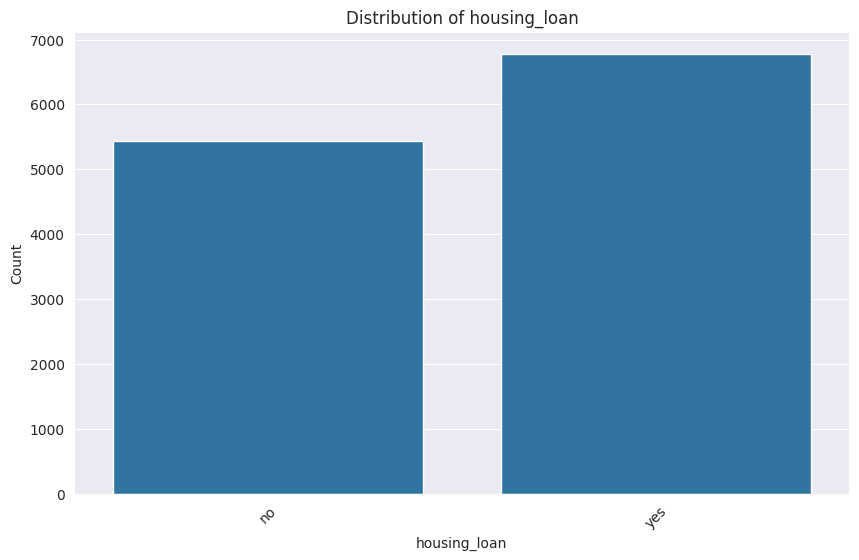

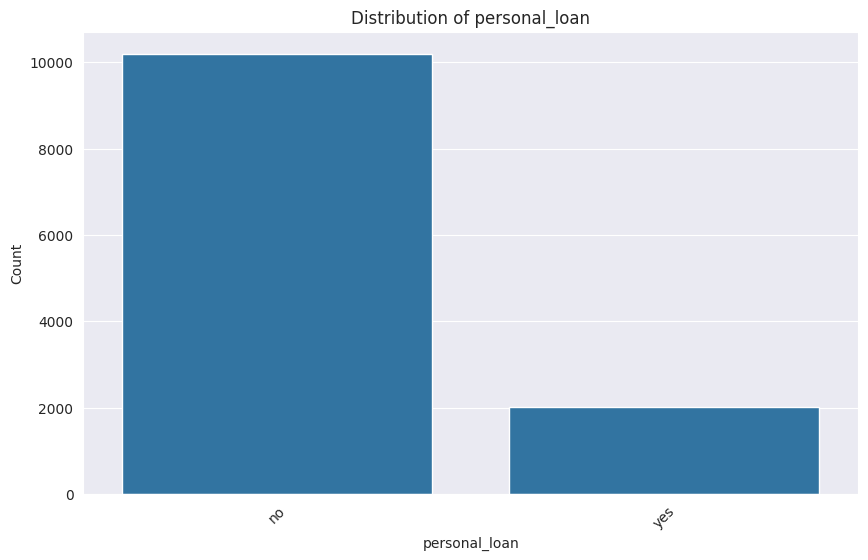

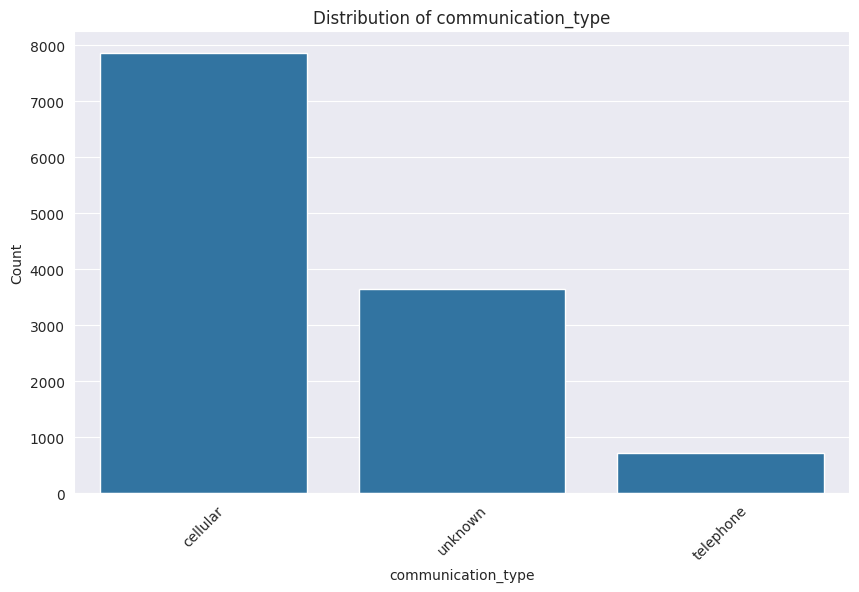

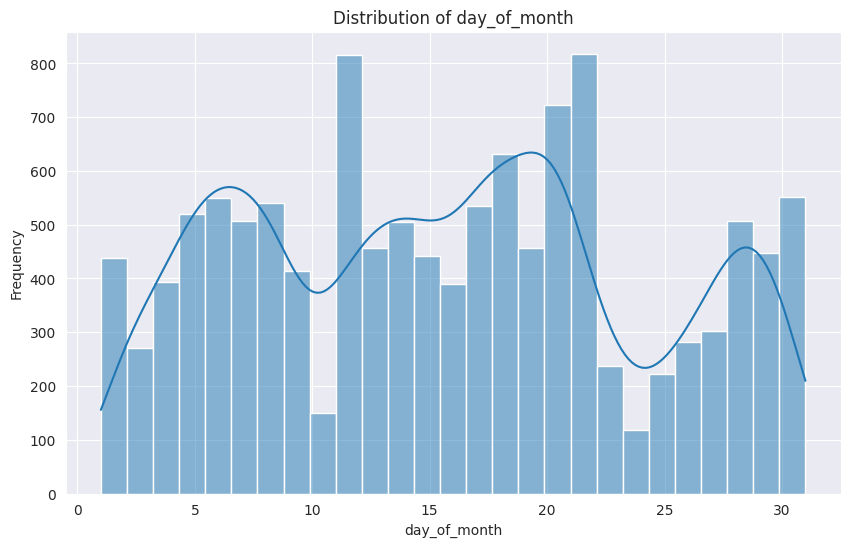

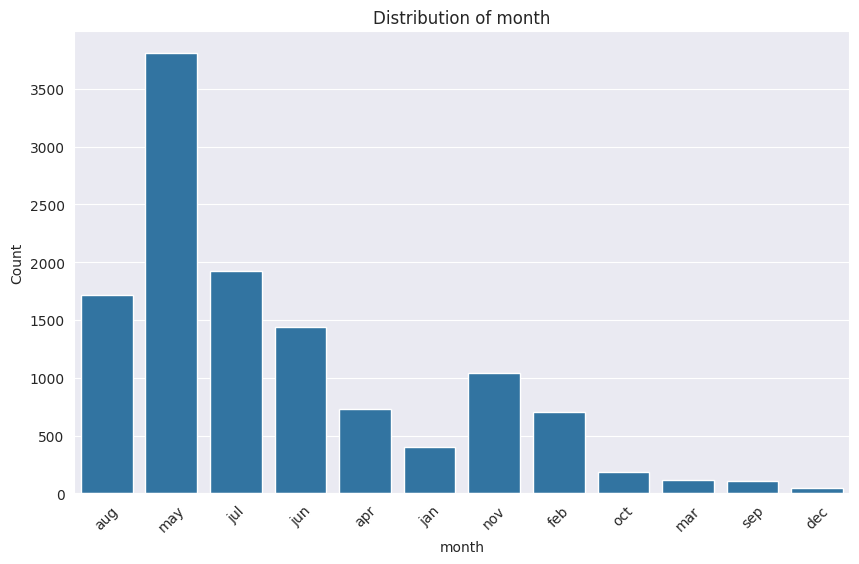

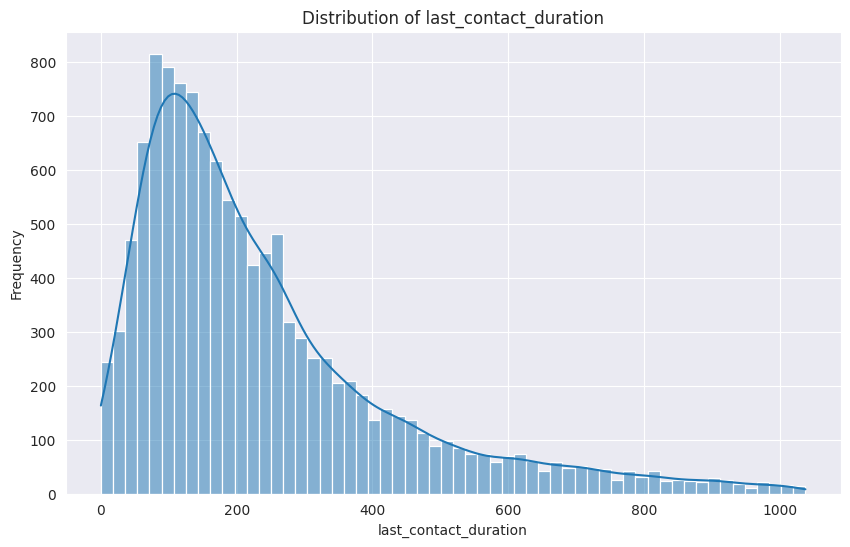

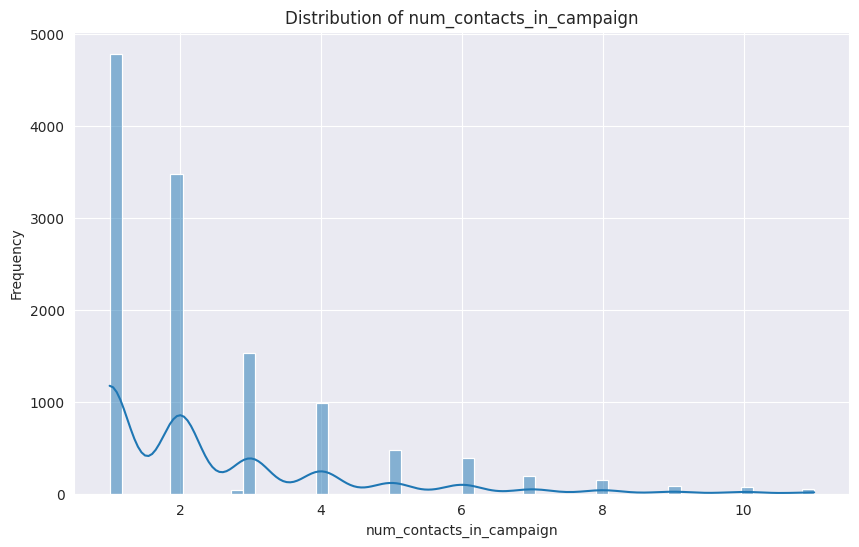

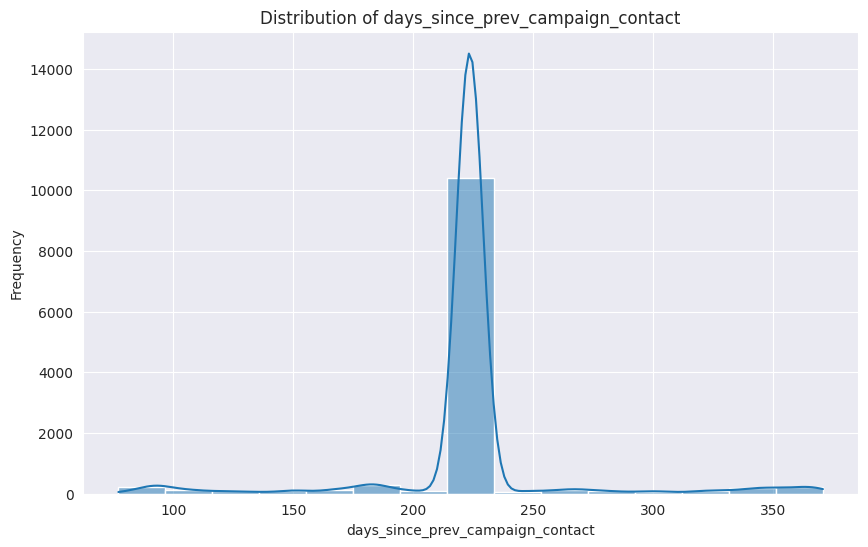

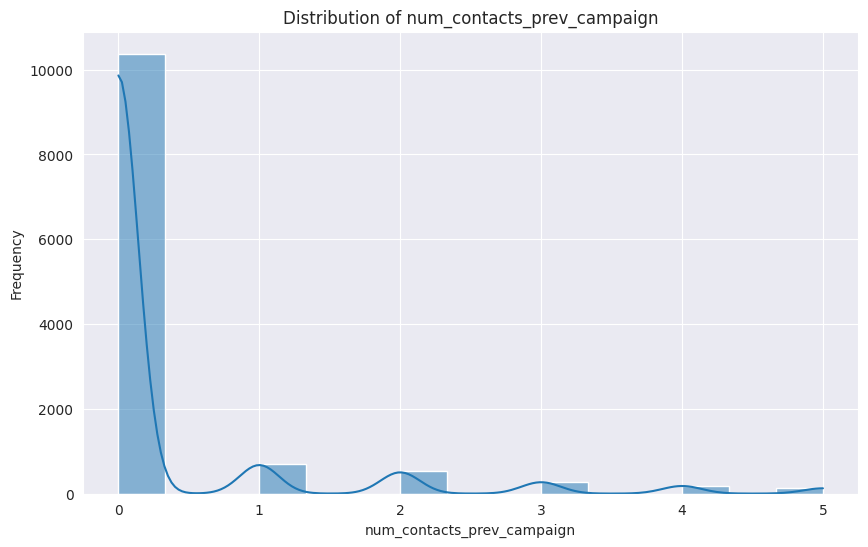

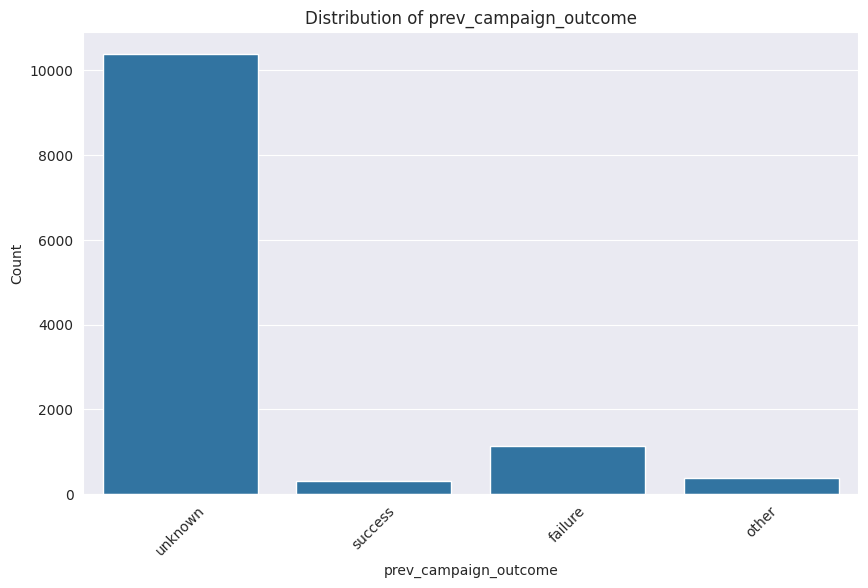

In [ ]:
#test_data
sns.set_style("darkgrid")

columns_to_visualize = ['customer_age', 'job_type', 'marital', 'education', 'default',
                        'balance', 'housing_loan', 'personal_loan', 'communication_type',
                        'day_of_month', 'month', 'last_contact_duration',
                        'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
                        'num_contacts_prev_campaign', 'prev_campaign_outcome']

# Loop through each column and create visualizations
for column in columns_to_visualize:
    plt.figure(figsize=(10, 6))

    # Numeric column: histogram
    if test_data[column].dtype in ['int64', 'float64']:
        sns.histplot(test_data[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

    # Categorical column: count plot
    else:
        sns.countplot(data=test_data, x=column)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)

    plt.show()


Data Encoding

In [ ]:
# One-hot encode categorical features in training data
train_data = pd.get_dummies(train_data, columns= ['job_type','marital','education','default','housing_loan','personal_loan','communication_type','month','prev_campaign_outcome'])

# One-hot encode categorical features in testing data
test_data = pd.get_dummies(test_data, columns=['job_type','marital','education','default','housing_loan','personal_loan','communication_type','month','prev_campaign_outcome'])


Feature Selection

In [ ]:
# Assuming all features are relevant, selected all columns except the target variable
numeric_columns = train_data.select_dtypes(include=['int64', 'float64']).columns
X = train_data[numeric_columns].drop(columns=['term_deposit_subscribed'])


Algorithm Selection

In [ ]:
#KMeans Algorithm
from sklearn.cluster import KMeans

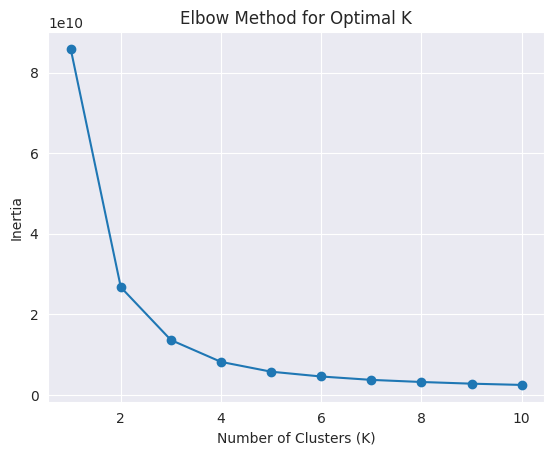

In [ ]:
# Elbow Method for Optimal K
K_range = range(1, 11)
inertia_values = []

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=0)
    kmeans.fit(X)
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

# Elbow method
plt.plot(K_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit KMeans model
kmeans.fit(X)

cluster_labels = kmeans.labels_
clusters_predict = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

print(f"Davies bouldin score: {davies_bouldin_score(X,clusters_predict)}")
print(f"Calinski Score: {calinski_harabasz_score(X,clusters_predict)}")
print(f"Silhouette Score: {silhouette_score(X,clusters_predict)}")

Davies bouldin score: 0.5260082489482071
Calinski Score: 76439.32465930552
Silhouette Score: 0.661722408673775


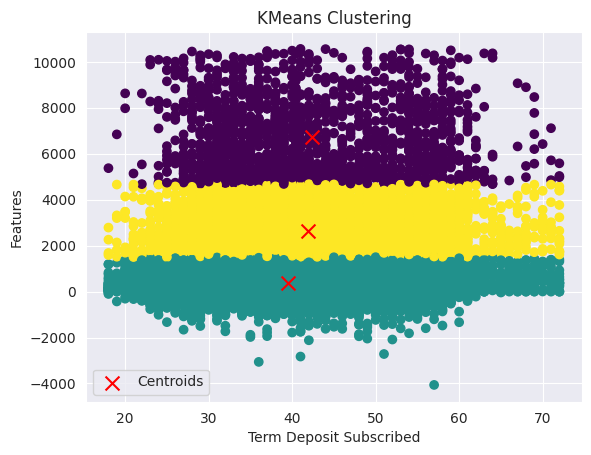

In [ ]:
# Plot the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')
plt.xlabel('Term Deposit Subscribed')
plt.ylabel('Features')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

In [ ]:
# Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
y_hc

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
# Silhouette score for Agglomerative clustering
silhouette_agg = silhouette_score(X, y_hc)
print("Agglomerative clustering Silhouette Score:", silhouette_agg)


Agglomerative clustering Silhouette Score: 0.6350563830091178


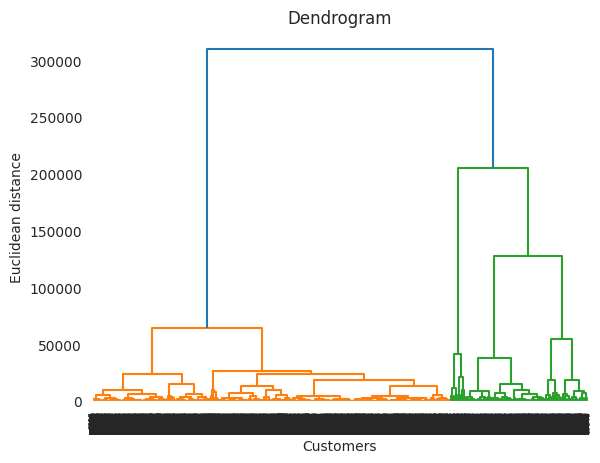

In [ ]:
# Dendrogram
#Using dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
# Gaussian Mixture Model
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
gmm_labels = gmm.predict(X)

In [ ]:
# Silhouette score for GMM
gmm_silhouette_score = silhouette_score(X, gmm_labels)
print("GMM Silhouette Score:", gmm_silhouette_score)

GMM Silhouette Score: 0.20703912053392412


Cluster 1 Analysis:

Demographic and Financial Attributes:
       customer_age       balance
count  22490.000000  22490.000000
mean      39.554210    358.289363
std        9.892859    474.675838
min       18.000000  -4062.000000
25%       32.000000     15.000000
50%       38.000000    249.500000
75%       47.000000    640.000000
max       72.000000   1500.000000


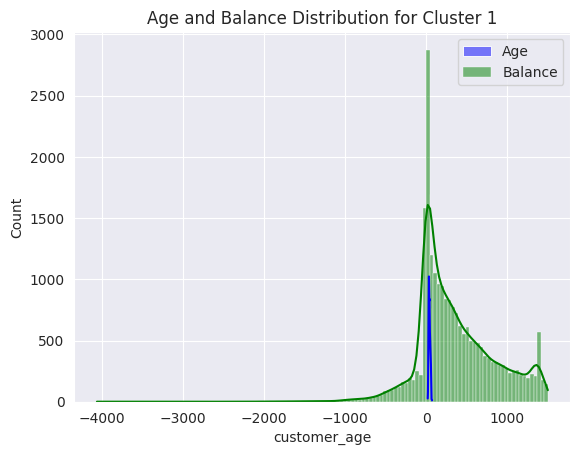


Communication Preferences:


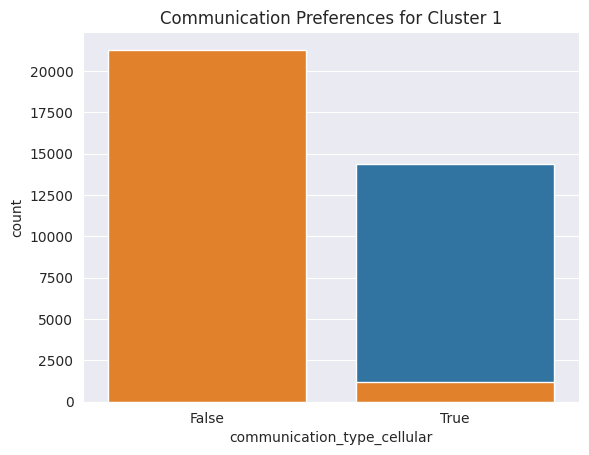


Subscription Rate for Cluster 1:
term_deposit_subscribed
0    92.307692
1     7.692308
Name: proportion, dtype: float64


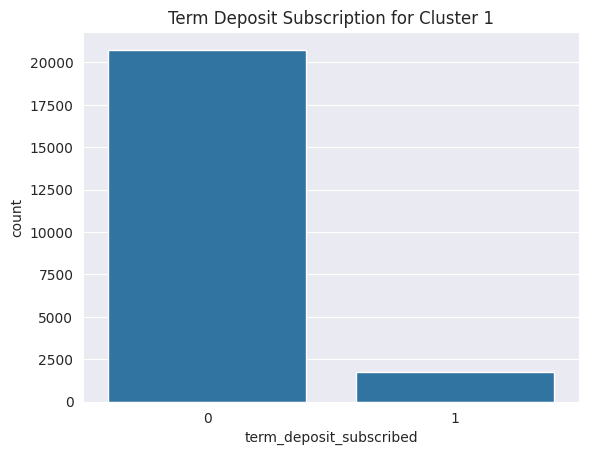


Frequency of Interactions:
count    22490.000000
mean         2.479325
std          1.966500
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         12.000000
Name: num_contacts_in_campaign, dtype: float64


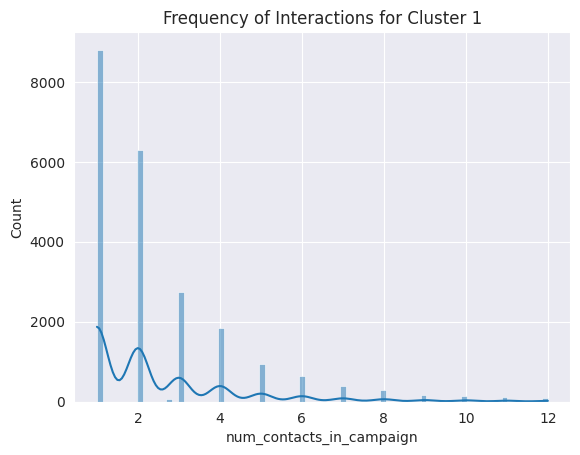


Previous Campaign Outcomes:


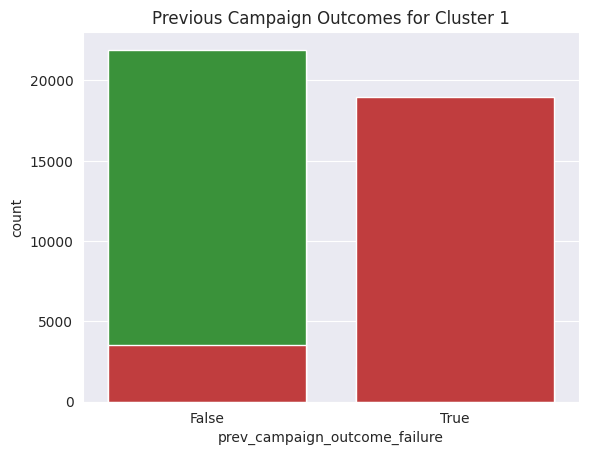


Job Types:


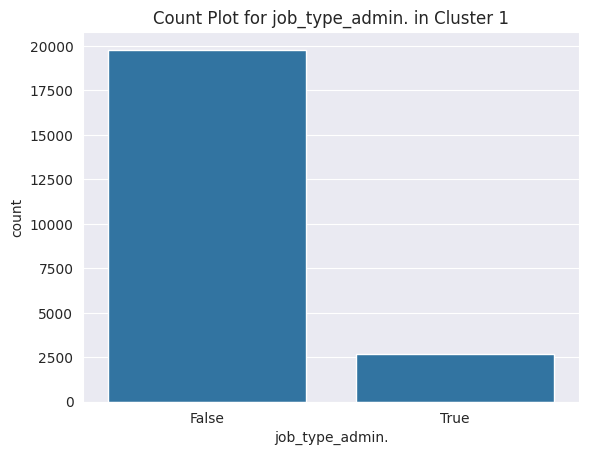

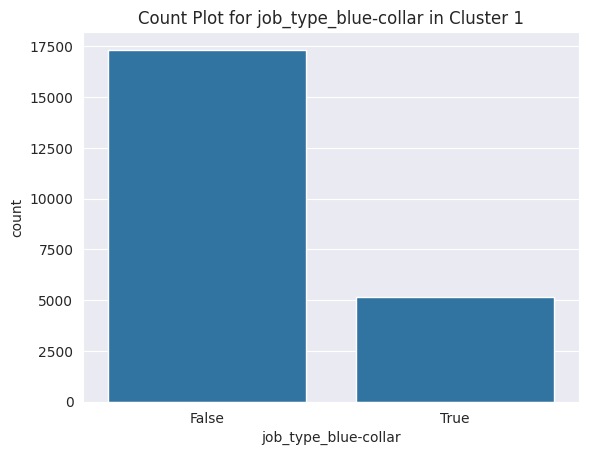

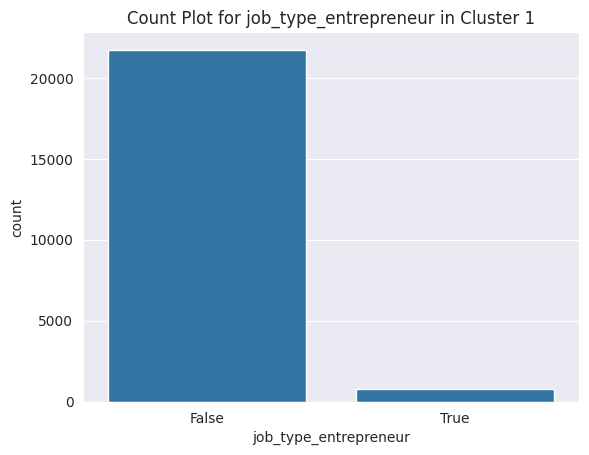

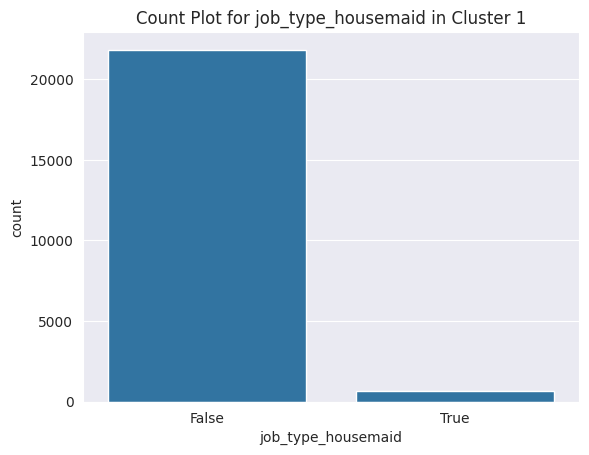

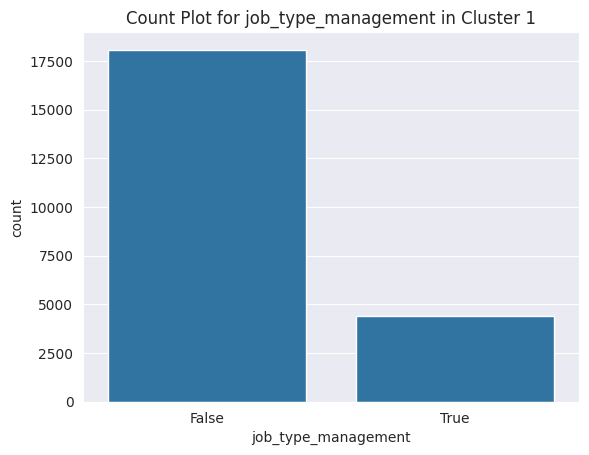

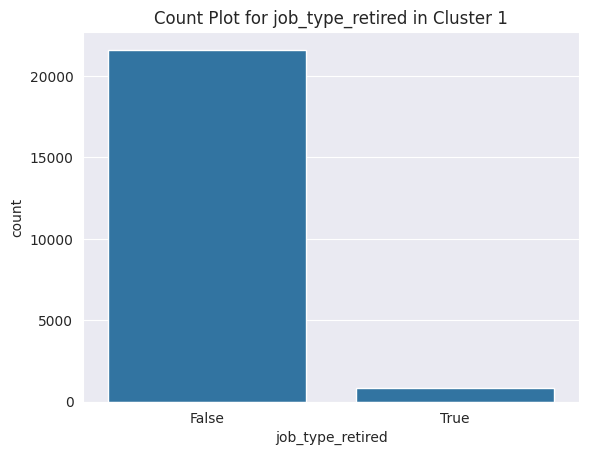

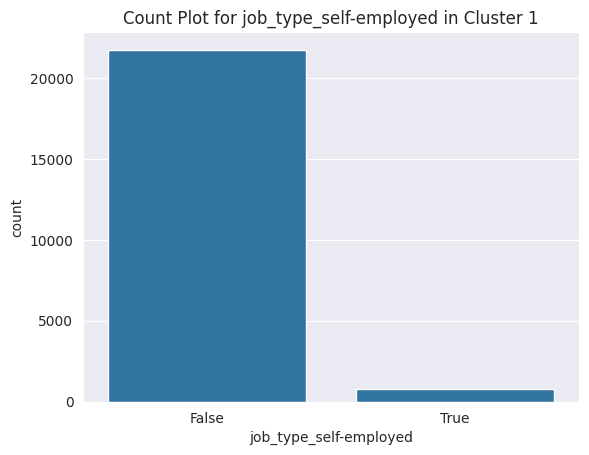

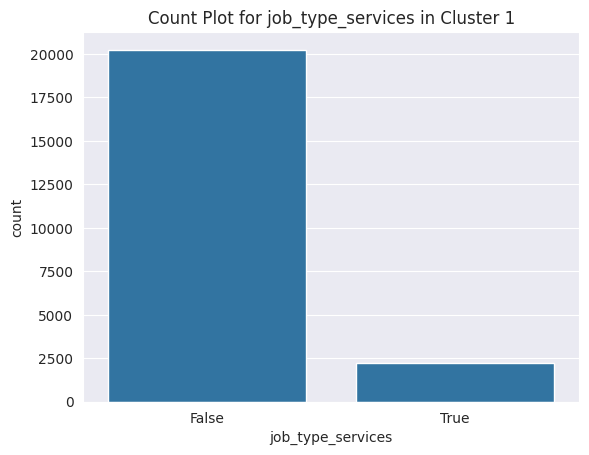

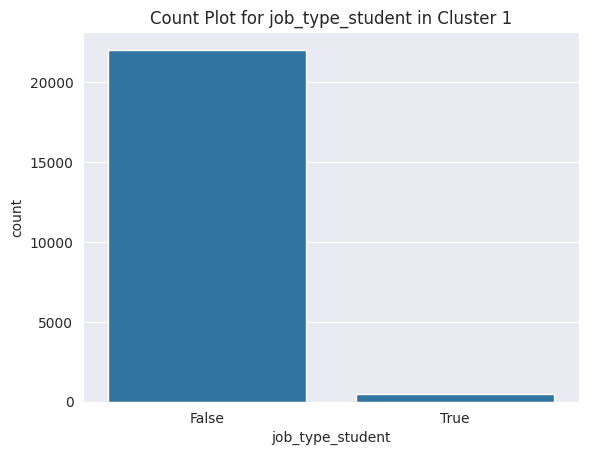

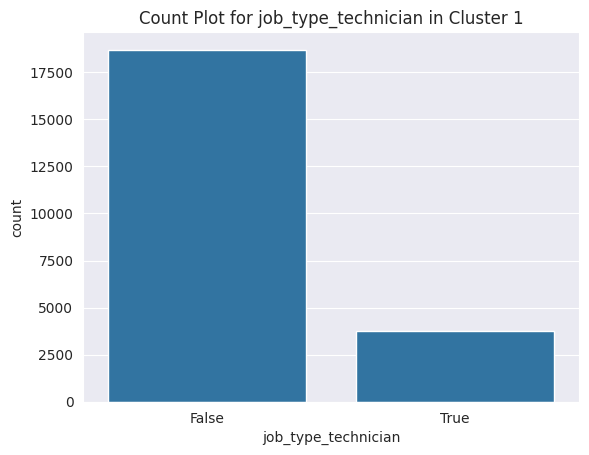

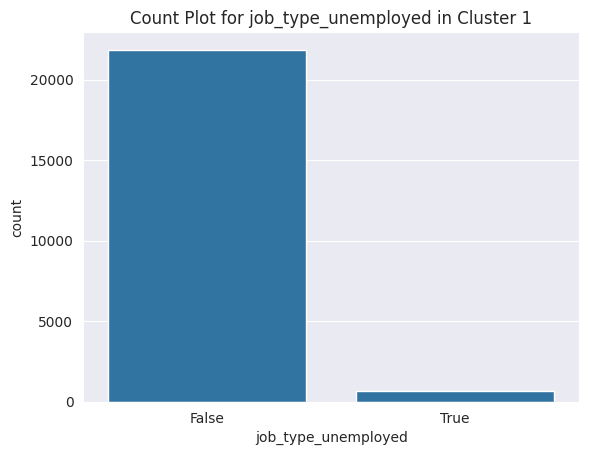

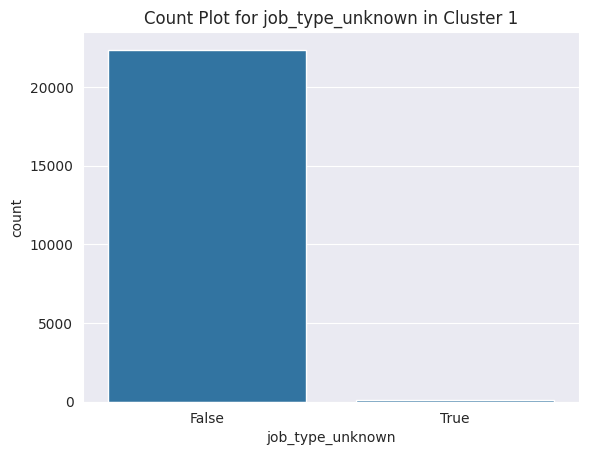



Cluster 2 Analysis:

Demographic and Financial Attributes:
       customer_age      balance
count   4856.000000  4856.000000
mean      41.917677  2638.002883
std       10.568915   866.439857
min       18.000000  1496.000000
25%       34.000000  1885.750000
50%       40.439216  2450.000000
75%       50.000000  3271.250000
max       72.000000  4677.000000


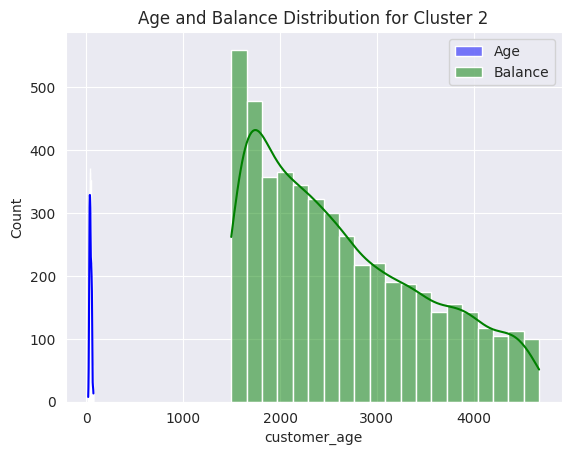


Communication Preferences:


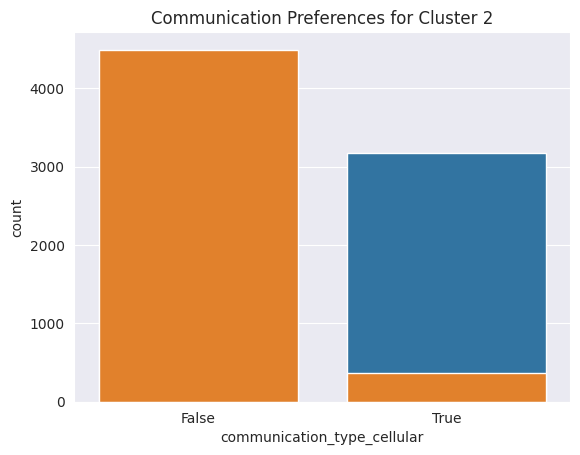


Subscription Rate for Cluster 2:
term_deposit_subscribed
0    86.738056
1    13.261944
Name: proportion, dtype: float64


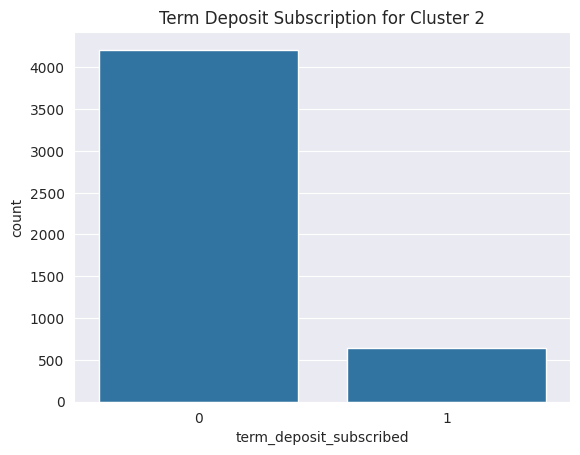


Frequency of Interactions:
count    4856.000000
mean        2.399136
std         1.885368
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        12.000000
Name: num_contacts_in_campaign, dtype: float64


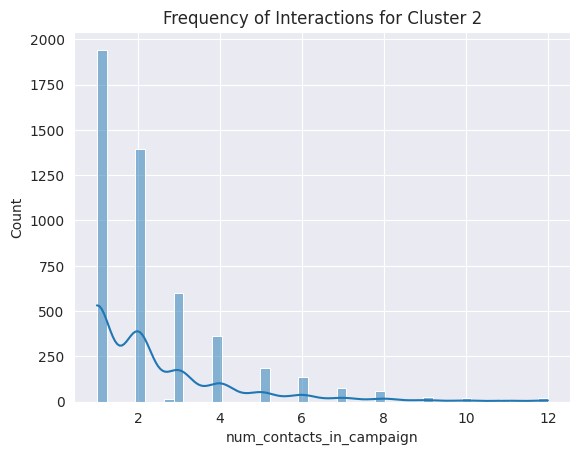


Previous Campaign Outcomes:


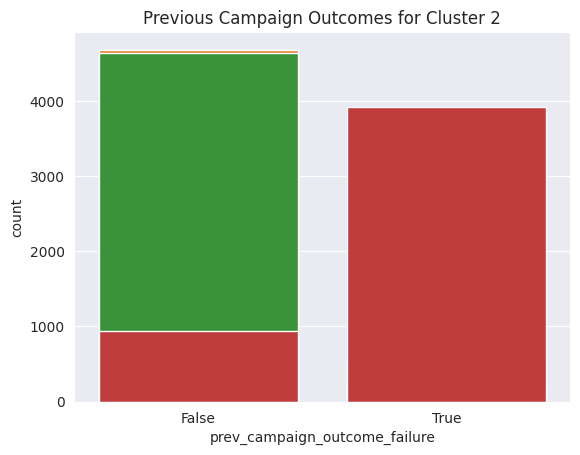


Job Types:


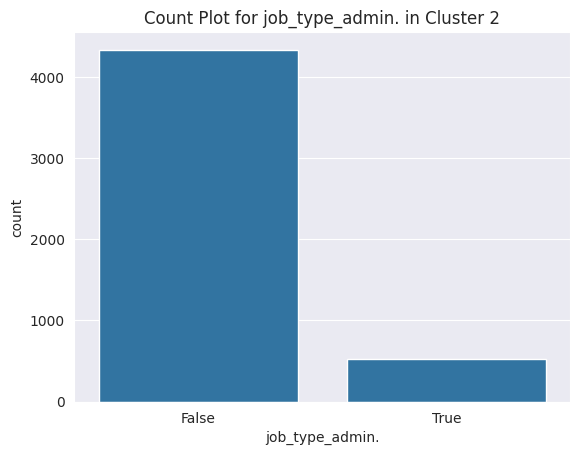

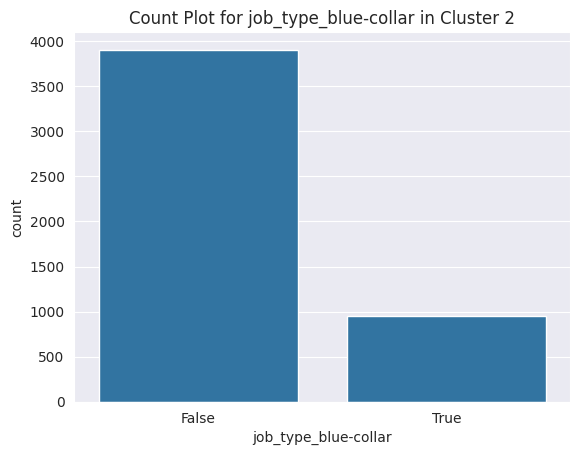

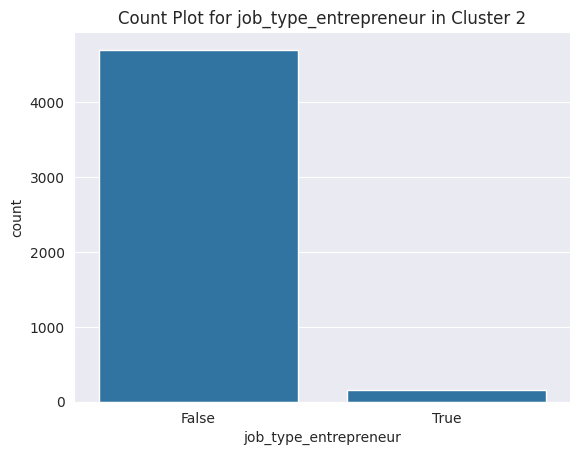

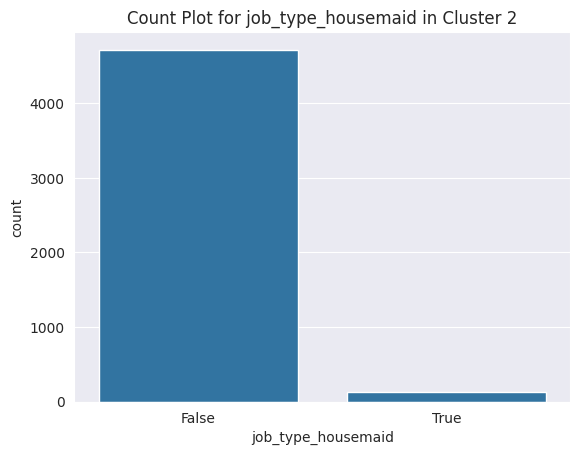

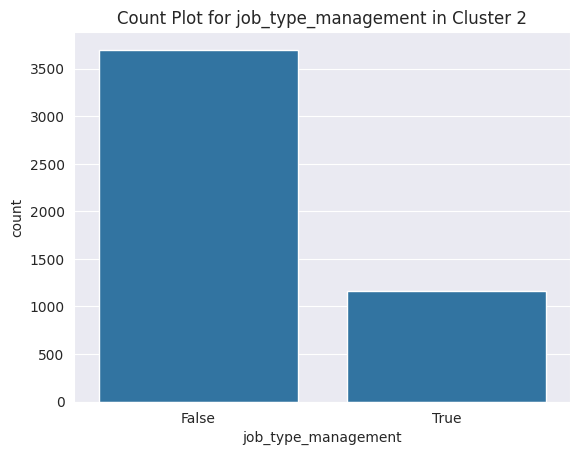

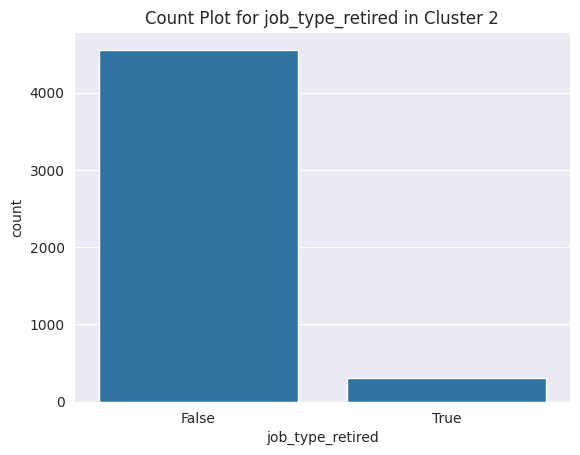

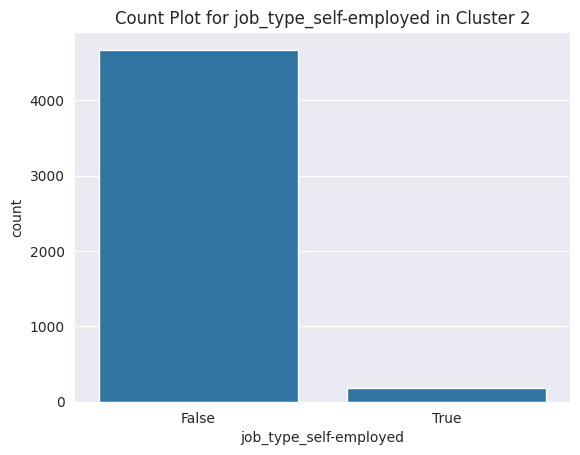

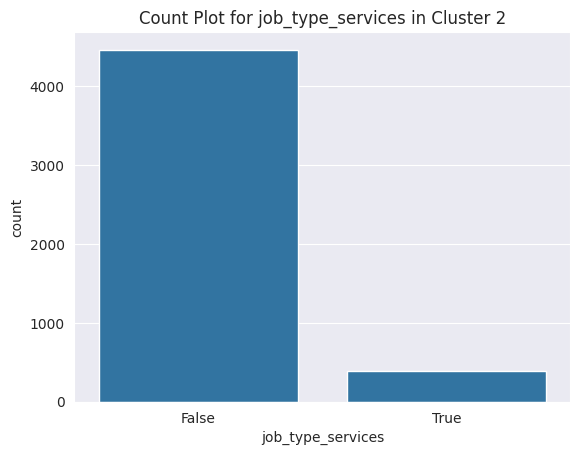

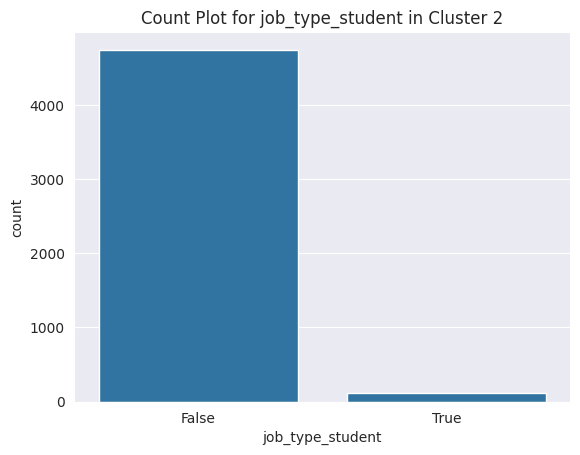

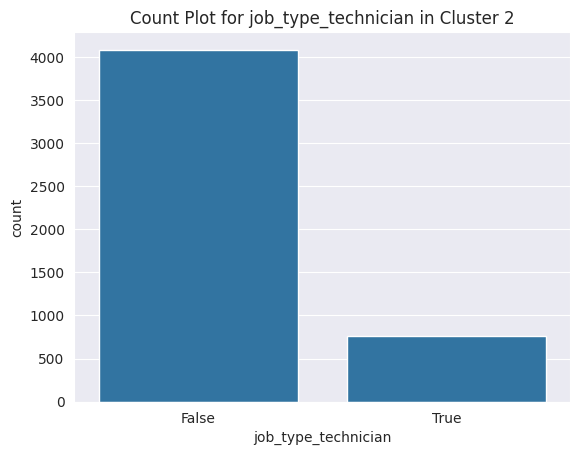

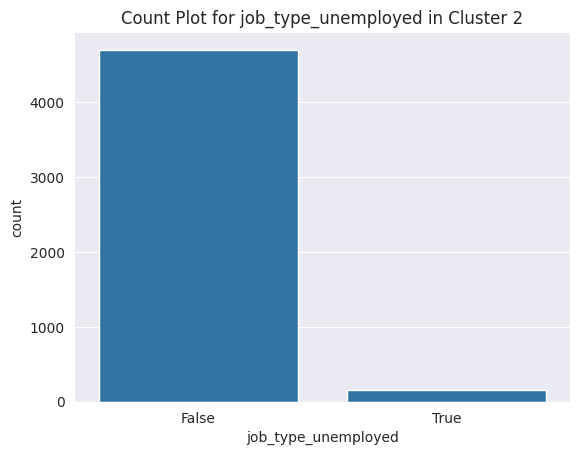

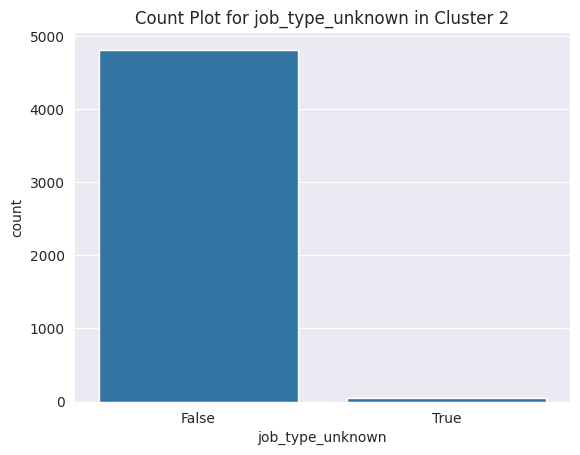



Cluster 0 Analysis:

Demographic and Financial Attributes:
       customer_age       balance
count   1536.000000   1536.000000
mean      42.398838   6711.962240
std       10.584057   1587.531127
min       18.000000   4678.000000
25%       33.750000   5317.250000
50%       41.000000   6341.000000
75%       51.000000   7916.000000
max       72.000000  10562.000000


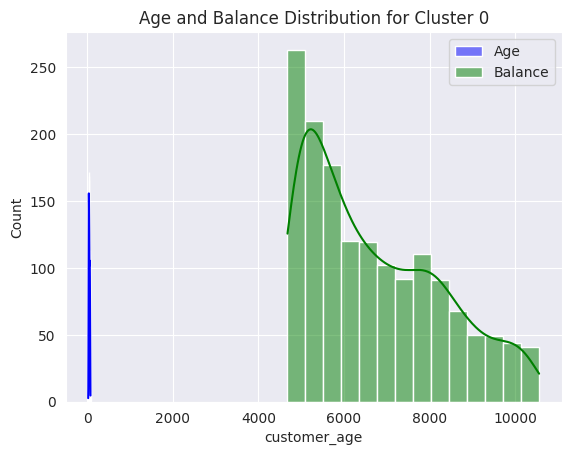


Communication Preferences:


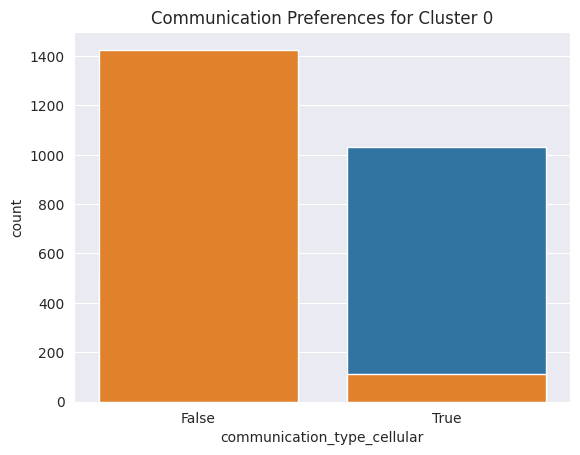


Subscription Rate for Cluster 0:
term_deposit_subscribed
0    86.848958
1    13.151042
Name: proportion, dtype: float64


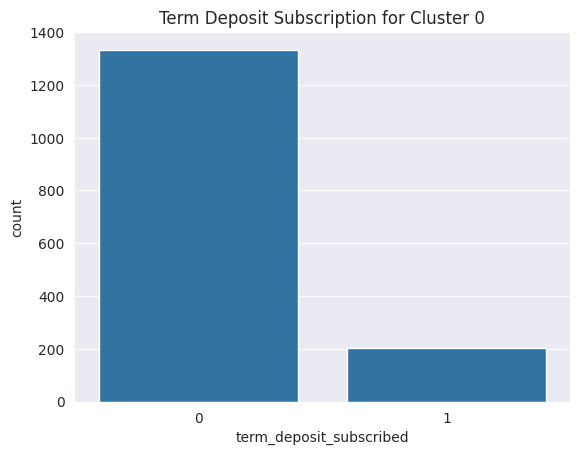


Frequency of Interactions:
count    1536.000000
mean        2.411091
std         1.921699
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        11.000000
Name: num_contacts_in_campaign, dtype: float64


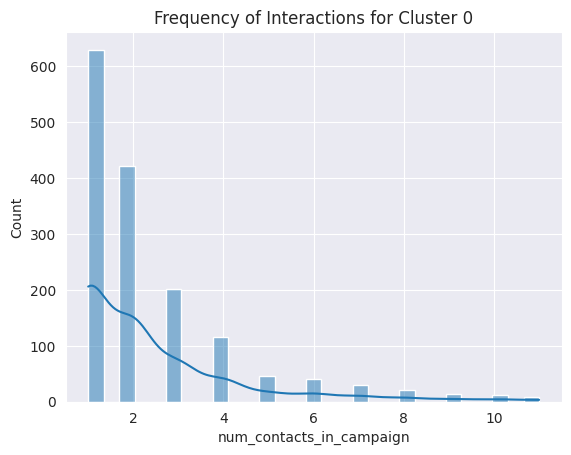


Previous Campaign Outcomes:


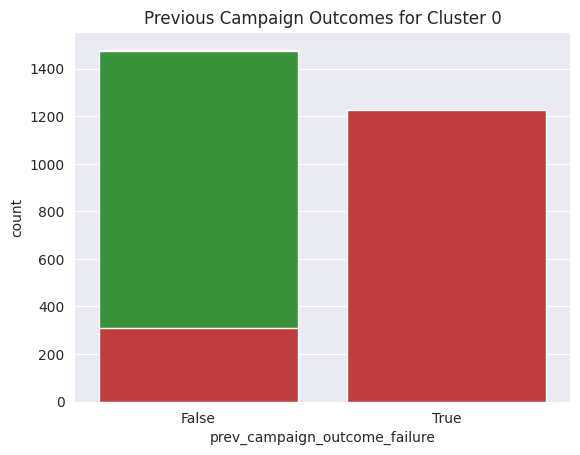


Job Types:


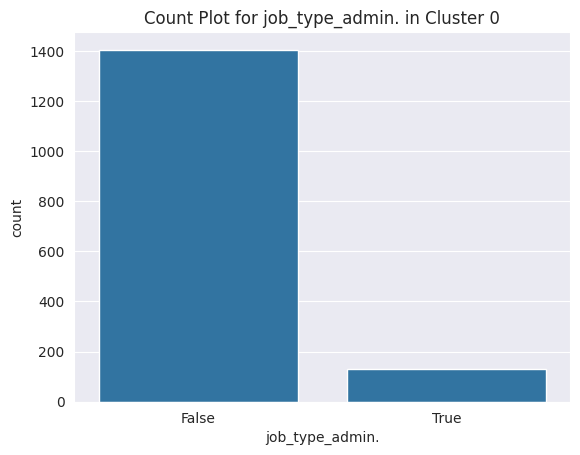

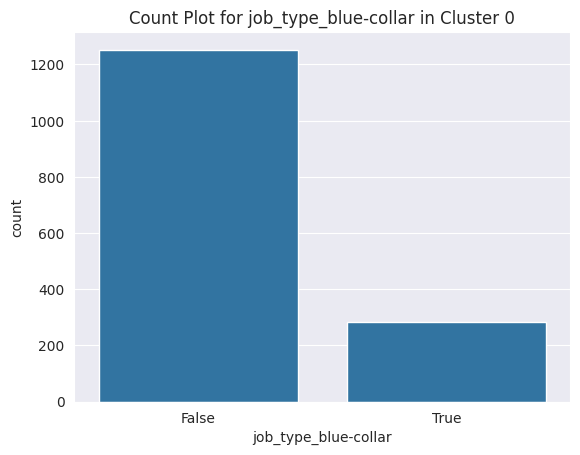

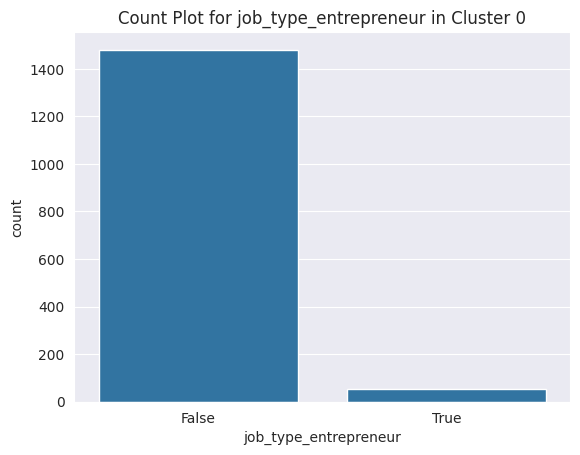

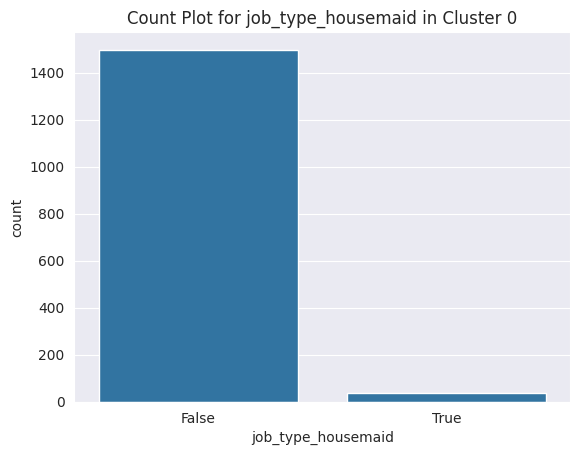

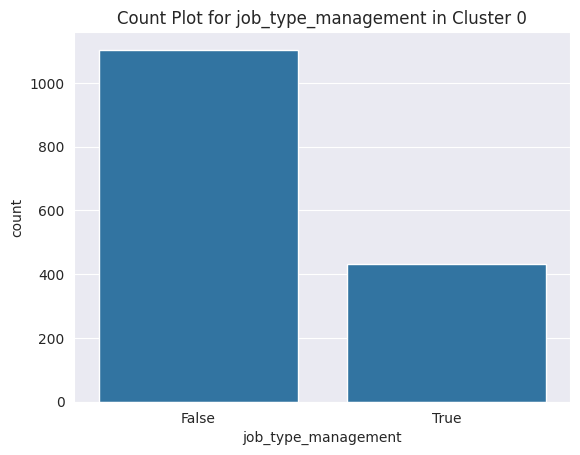

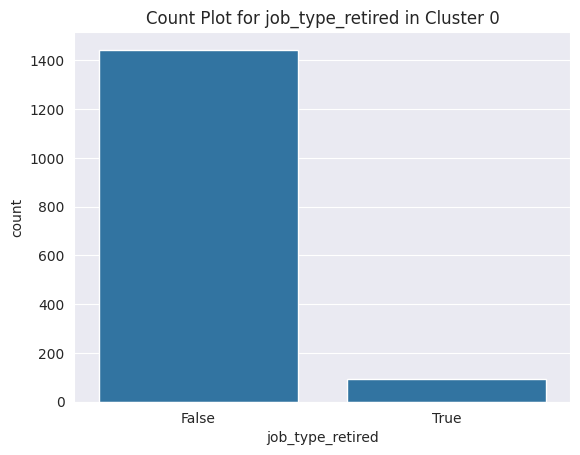

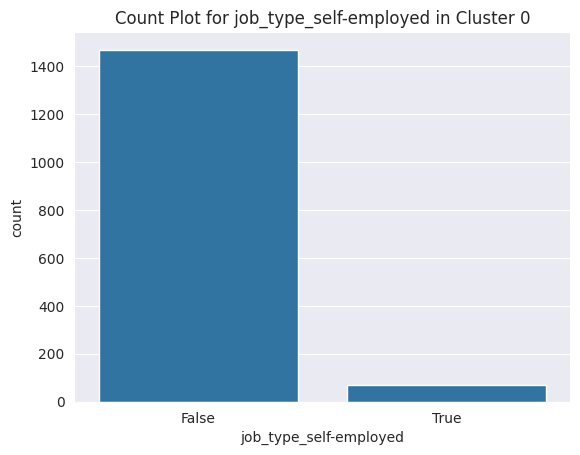

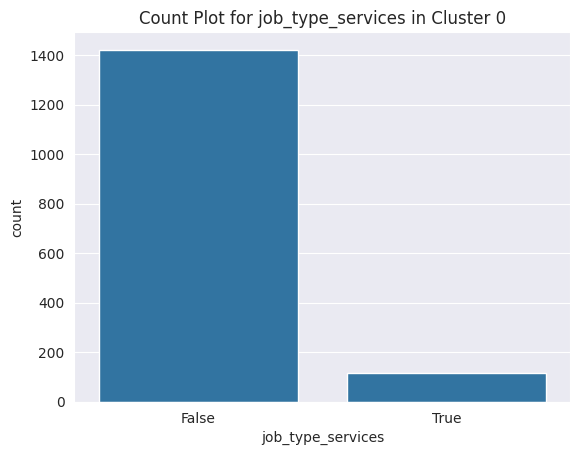

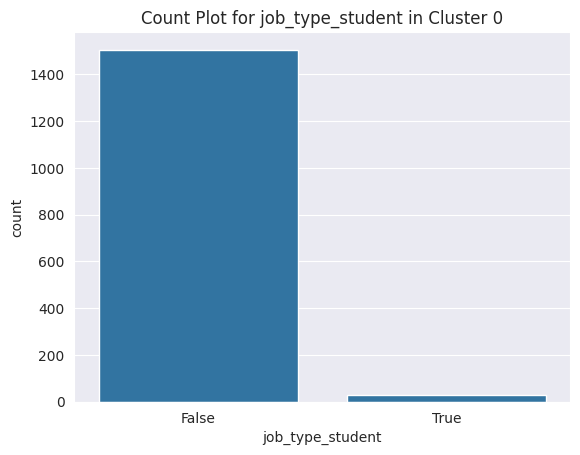

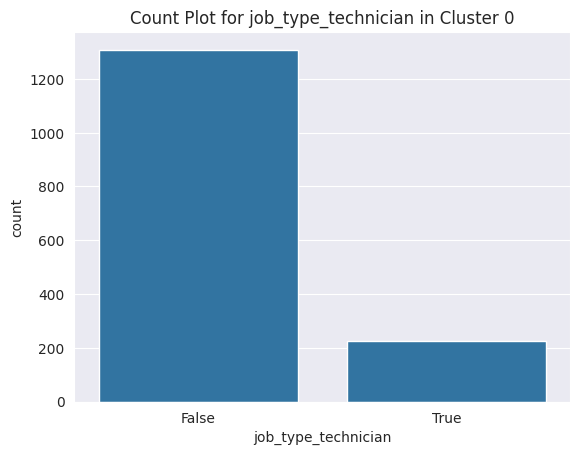

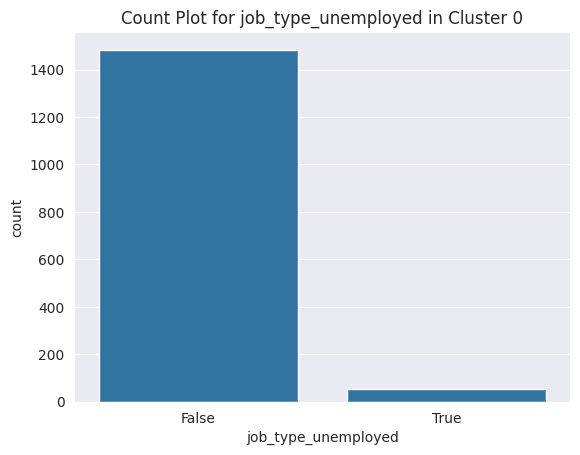

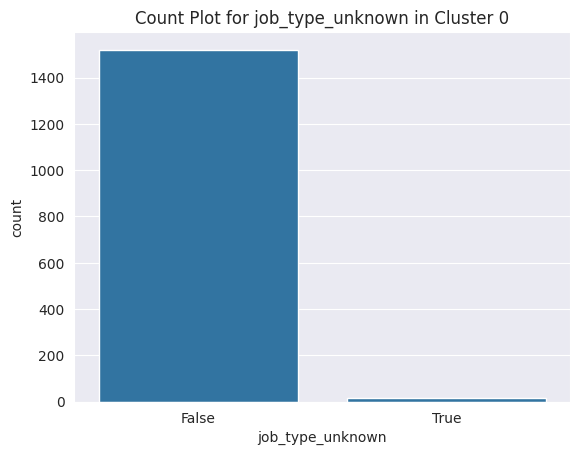

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_data['cluster'] = cluster_labels

def analyze_clusters(data):

    clusters = train_data['cluster'].unique()


    for cluster in clusters:
        print(f"Cluster {cluster} Analysis:")

        cluster_data = train_data[train_data['cluster'] == cluster]
        # Demographic and financial attributes
        print("\nDemographic and Financial Attributes:")
        demo_fin_attributes = ['customer_age', 'balance']
        print(cluster_data[demo_fin_attributes].describe())

        # age and balance distributions
        plt.figure()
        sns.histplot(cluster_data['customer_age'], kde=True, color='blue', label='Age')
        sns.histplot(cluster_data['balance'], kde=True, color='green', label='Balance')
        plt.title(f"Age and Balance Distribution for Cluster {cluster}")
        plt.legend()
        plt.show()

        # Communication preferences
        print("\nCommunication Preferences:")
        sns.countplot(data=cluster_data, x='communication_type_cellular')
        sns.countplot(data=cluster_data, x='communication_type_telephone')
        plt.title(f"Communication Preferences for Cluster {cluster}")
        plt.show()

        # Term deposit subscription rate
        subscription_rate = cluster_data['term_deposit_subscribed'].value_counts(normalize=True) * 100
        print(f"\nSubscription Rate for Cluster {cluster}:")
        print(subscription_rate)

        # term deposit subscription
        sns.countplot(data=cluster_data, x='term_deposit_subscribed')
        plt.title(f"Term Deposit Subscription for Cluster {cluster}")
        plt.show()

        # Frequency of interactions
        print("\nFrequency of Interactions:")
        print(cluster_data['num_contacts_in_campaign'].describe())

        # frequency of interactions
        sns.histplot(cluster_data['num_contacts_in_campaign'], kde=True)
        plt.title(f"Frequency of Interactions for Cluster {cluster}")
        plt.show()

        # Previous campaign outcomes
        print("\nPrevious Campaign Outcomes:")
        sns.countplot(data=cluster_data, x='prev_campaign_outcome_failure')
        sns.countplot(data=cluster_data, x='prev_campaign_outcome_other')
        sns.countplot(data=cluster_data, x='prev_campaign_outcome_success')
        sns.countplot(data=cluster_data, x='prev_campaign_outcome_unknown')
        plt.title(f"Previous Campaign Outcomes for Cluster {cluster}")
        plt.show()

        # Job types analysis
        print("\nJob Types:")
        job_cols = [col for col in cluster_data.columns if col.startswith('job_type_')]

        for job_col in job_cols:
            sns.countplot(data=cluster_data, x=job_col)
            plt.title(f"Count Plot for {job_col} in Cluster {cluster}")
            plt.show()

        def analyze_marital_status(cluster_data, cluster):
              print("\nMarital Status:")
              marital_cols = ['marital_divorced', 'marital_married', 'marital_single']

              for marital_col in marital_cols:
                  sns.countplot(data=cluster_data, x=marital_col)
                  plt.title(f"Count Plot for {marital_col} in Cluster {cluster + 1}")
                  plt.show()

              for cluster in range(3):

                  cluster_data = train_data[train_data['cluster'] == cluster]
                  print(f"Cluster {cluster + 1} Analysis:")
                  analyze_marital_status(cluster_data, cluster)

        def analyze_education_levels(cluster_data, cluster):
              print("\nEducation Levels:")
              education_cols = ['education_primary', 'education_secondary', 'education_tertiary', 'education_unknown']

              for education_col in education_cols:
                  sns.countplot(data=cluster_data, x=education_col)
                  plt.title(f"Count Plot for {education_col} in Cluster {cluster + 1}")
                  plt.show()

              for cluster in range(3):

                  cluster_data = train_data[train_data['cluster'] == cluster]
                  print(f"Cluster {cluster + 1} Analysis:")
                  analyze_education_levels(cluster_data, cluster)


        print("\n")

analyze_clusters(train_data)


Cluster 1 Term Deposit Subscription Analysis:

Subscription Rate for Cluster 1:
term_deposit_subscribed
0    92.307692
1     7.692308
Name: proportion, dtype: float64


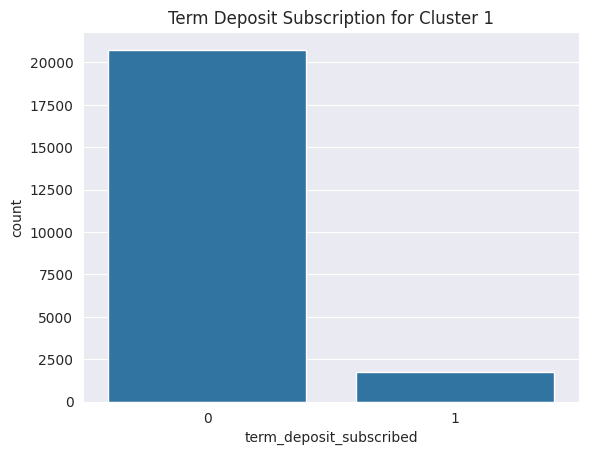



Cluster 2 Term Deposit Subscription Analysis:

Subscription Rate for Cluster 2:
term_deposit_subscribed
0    86.738056
1    13.261944
Name: proportion, dtype: float64


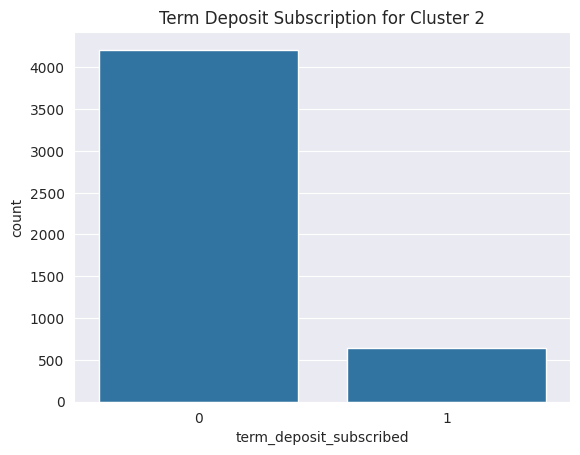



Cluster 0 Term Deposit Subscription Analysis:

Subscription Rate for Cluster 0:
term_deposit_subscribed
0    86.848958
1    13.151042
Name: proportion, dtype: float64


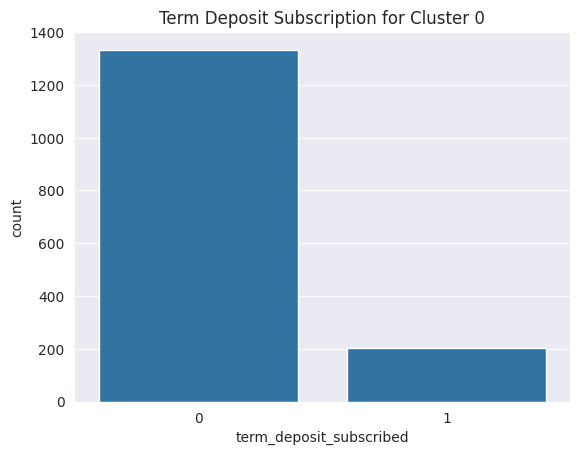

In [ ]:
def analyze_term_deposit_subscription(data):

    clusters = train_data['cluster'].unique()

    for cluster in clusters:
        print(f"Cluster {cluster} Term Deposit Subscription Analysis:")

        cluster_data = train_data[train_data['cluster'] == cluster]

        subscription_rate = cluster_data['term_deposit_subscribed'].value_counts(normalize=True) * 100
        print(f"\nSubscription Rate for Cluster {cluster}:")
        print(subscription_rate)

        sns.countplot(data=cluster_data, x='term_deposit_subscribed')
        plt.title(f"Term Deposit Subscription for Cluster {cluster}")
        plt.show()

        print("\n")

analyze_term_deposit_subscription(train_data)


In [ ]:
#Applying KNN algorithm to predict the test data
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


In [ ]:
X = train_data.drop(columns=['term_deposit_subscribed'])
y = train_data['term_deposit_subscribed']

In [ ]:
X_train = X
y_train = y
X_test = test_data

In [ ]:
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

In [ ]:
k = 5

knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

In [ ]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
results = test_data[['id']].copy()
results['term_deposit_subscribed'] = y_pred

results.to_csv('test_predictions.csv', index=False)
print("Predictions saved to 'test_predictions.csv'")

Predictions saved to 'test_predictions.csv'


In [ ]:
df = pd.read_csv('/content/test_predictions.csv')

In [ ]:
df.head()

,id,term_deposit_subscribed
0,id_17231,0
1,id_34508,0
2,id_44504,0
3,id_174,0
4,id_2115,1


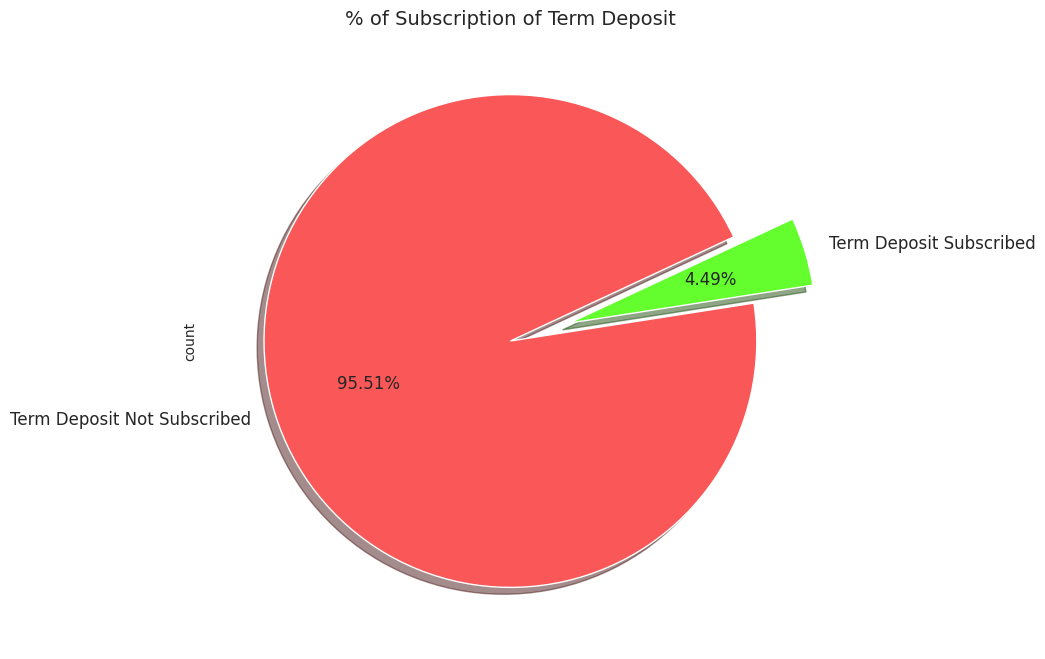

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Term Deposit Not Subscribed", "Term Deposit Subscribed"

df["term_deposit_subscribed"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax, shadow=True, colors=colors,
                                             labels=labels, fontsize=12, startangle=25)

plt.title('% of Subscription of Term Deposit', fontsize=14)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12216 entries, 0 to 12215
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       12216 non-null  object
 1   term_deposit_subscribed  12216 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 191.0+ KB


# Conclusion

Cluster 0 represents high-value customers who are financially secure and more likely to benefit from exclusive investment options and personalized financial services. This segment offers opportunities for providing high-interest term deposits, wealth management services, and customized financial planning.

Cluster 1 comprises younger customers with lower balances who are at the beginning of their financial journeys. This segment can benefit from accessible savings options, such as lower-threshold term deposits and savings accounts with attractive incentives.

Cluster 2 includes customers with moderate balances who may be interested in medium-value investments and balanced portfolio management. Targeting this segment with medium-interest term deposits and balanced financial products can help enhance customer satisfaction and retention.